# ***Loan Credit Risk Analytics EDA Case study***

## Retrieving and Understanding data 

In [2]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# Setting display options

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

In [4]:
# Loading the required datasets

# Loading the dataset related to Loan Applications

master_application_data = pd.read_csv("application_data.csv")

In [5]:
# Displaying the loaded dataset's head for quick glance

master_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# View the shape of the dataset

master_application_data.shape

(307511, 122)

In [7]:
# Let's understand the data types of all the columns and counts

master_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# Let's view the statistical information from the columns those are already numeric

master_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Data Handling and Data Cleaning
- We will analyze the columns that are required for the analysis, according to the business objective.
- We will manage all the missing/null values that may be present in some of the columns.
- We will correct the data types of certain columns.

#### Extracting required columns
- Let's view the columns and their importance for the analysis.
- We will consider only those columns that are required to achieve the business objective.
- We will not consider all the extra informations for the analysis and to generate insights.

In [9]:
# We will create a copy of master dataset into another data set, and perform the required clening on that data to generate insights

application_data = master_application_data

In [10]:
# Let's view first 31 columns

application_data.iloc[:,:30].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0                 1           1           0        Laborers              1.0  
1                 1           1           0      Core staff              2.0  
2                 1           1           0        Laborers              1.0  
3                 1           0           0        Laborers              2.0  
4                 1           0           0      Core staff              1.0

#### Discarding below mentioned columns from analysis directly after studying their meaning and importance.
- Not considering below columns will not affect the analysis to the Target Variable based on the business objective.
    - NAME_TYPE_SUITE (Who accompanying the client while applying the loan may not affect Target Variable)
    - REGION_POPULATION_RELATIVE (Population where the client lives also can be ignored from the analysis)
    - DAYS_REGISTRATION (Days of changing the application may not affect Target)
    - DAYS_ID_PUBLISH (Similarly, days of changing the identity also can be ignored)
    - FLAG_MOBIL (Information about whether client has mobile or not can be ignored)
    - FLAG_EMP_PHONE (Similarly, whether the client has provided phone number or not can be ignored)
    - FLAG_WORK_PHONE (Whether the client has provided office phone number or not can also be ignored)
    - FLAG_CONT_MOBILE (Whether the mobile was reachable or not can also be ignored from analysis)
    - FLAG_PHONE (Client provided home phone or not can also be ignored)
    - FLAG_EMAIL (Information about the e-mail is also not required for analysis)

In [11]:
# Deleting the above mentioned columns
# del application_data['NAME_TYPE_SUITE']
# del application_data['REGION_POPULATION_RELATIVE']
# del application_data['DAYS_REGISTRATION']
# del application_data['DAYS_ID_PUBLISH']
application_data.drop(
    ['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],
    axis=1,inplace=True)
application_data.drop(
    application_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'],
    axis = 1,inplace=True)

In [12]:
# Displaying the dataframe after performing the operation

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          NaN        Laborers              1.0                     2   
1          NaN      Core staff              2.0                     1   
2         26.0        Laborers              1.0                     2   
3          NaN        Laborers              2.0                     2   
4          NaN      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246           NaN   
2              Government           NaN      0.55

In [13]:
# Displaying the number of rows and columns

application_data.shape

(307511, 112)

In [14]:
# Let's analyze the remaining rows and their necessity for the analysis.

application_data.loc[:,'WEEKDAY_APPR_PROCESS_START':].head()

WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   
3           NaN      0.650442           NaN             NaN               NaN   
4           NaN      0.322738           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.00         0.0690         0.0833         0.1250        0.0369   
1           0.08         0.0345         0.2917         0.3333        0.0130   
2            NaN            NaN            NaN            NaN           NaN   
3            NaN            NaN            NaN            NaN           NaN   
4            NaN            NaN            NaN            NaN           NaN   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   
2                   NaN             NaN                      NaN   
3                   NaN             NaN                      NaN   
4                   NaN             NaN                      NaN   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   
2                NaN              NaN                NaN   
3                NaN              NaN                NaN   
4                NaN              NaN                NaN   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   
2                           NaN               NaN              NaN   
3                           NaN               NaN          

- This dataframe have a lot of non-required and non-essential columns and not considering those may not affect our analysis to achieve the business objective.
- After having glance through the columns, information about the address is not required for analysis and can be ignored from generating their insights.
- Only ORGANIZATION_TYPE can be required amongst all the above columns, hence we will extract only that column for further analysis, and ignore all other columns directly.

In [15]:
# Dropping non-essential columns from the data

application_data.drop(application_data.loc[:,'REGION_RATING_CLIENT':'LIVE_CITY_NOT_WORK_CITY'],axis = 1,inplace=True)
application_data.drop(application_data.loc[:,'EXT_SOURCE_1':],axis = 1,inplace=True)

In [16]:
# Displaying the result after dropping the columns

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
0          NaN        Laborers              1.0  Business Entity Type 3  
1          NaN      Core staff              2.0                  School  
2         26.0        Laborers              1.0              Government  
3          NaN        Laborers              2.0  Business Entity Type 3  
4          NaN      Core staff              1.0                Religion

In [17]:
# Analyze final shape of the dataframe after operations.

application_data.shape

(307511, 21)

In [18]:
# Displaying the info again so that we can get the information about data types and non-null values.

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  DAYS_BIRTH       

- Now, we have information about columns that can be considered for analysis and may be helpful in generating insights. Now we are going to analyze each and every column for null checks and missing values. We can then perform sanity checks also if required.

In [19]:
# Let's analyze the percentage of null values present in all the columns.

application_data.isnull().sum()/application_data.shape[0]*100

SK_ID_CURR              0.000000
TARGET                  0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
AMT_CREDIT              0.000000
AMT_ANNUITY             0.003902
AMT_GOODS_PRICE         0.090403
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
OWN_CAR_AGE            65.990810
OCCUPATION_TYPE        31.345545
CNT_FAM_MEMBERS         0.000650
ORGANIZATION_TYPE       0.000000
dtype: float64

In [20]:
# As 66% data is missing in the OWN_CAR_AGE column, so we will discard the column from analysis

application_data.drop(columns=['OWN_CAR_AGE'],axis = 1,inplace=True)

- As approximately 30% of the data is missing in OCCUPATION_TYPE column, then we can ignore the column from further analysis.

In [21]:
# Dropping the column OCCUPATION_TYPE

application_data.drop(['OCCUPATION_TYPE'], inplace=True, axis=1)

In [22]:
# Let's analyse the AMT_ANNUITY column for the missing values.

application_data[application_data.AMT_ANNUITY.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
47531           NaN         450000.0  Commercial associate   
50035           NaN         450000.0               Working   
51594           NaN         450000.0               Working   
55025           NaN         225000.0         State servant   
59934           NaN         360000.0               Working   
75873           NaN         166500.0               Working   
89343           NaN         157500.0         State servant   
123872          NaN         720000.0               Working   
207186          NaN         486000.0  Commercial associate   
227939          NaN         499500.0  Commercial associate   
239329          NaN         792000.0         State servant   
241835          NaN        1354500.0               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
47531     House / apartment      -10668          -2523              1.0   
50035     House / apartment       -9027          -1270              2.0   
51594     House / apartment      -17376          -3950              2.0   
55025     House / apartment      -11329          -2040              2.0   
59934     House / apartment      -19762          -2498              1.0   
75873      Rented apartment      -20831          -2450   

- We can remove those values from the data, as guessing the amount or replacing it with any other value is not feasible.

In [23]:
# Assigning the missing null values in the AMT_ANNUITY column with the median value of the column.

application_data = application_data[~application_data.AMT_ANNUITY.isnull()]

In [24]:
# Let's find the null values in appapplication_data once again. 

application_data.isnull().sum()

SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY              0
AMT_GOODS_PRICE        278
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
CNT_FAM_MEMBERS          2
ORGANIZATION_TYPE        0
dtype: int64

In [25]:
# Let's consider CNT_FAM_MEMBERS

application_data[application_data.CNT_FAM_MEMBERS.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
41982       33750.0              NaN  Commercial associate   
187348      29250.0              NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
41982       -12396          -1161              NaN               Insurance  
187348      -12844           -232              NaN  Business Entity Type 2

In [26]:
# Assigning the count of family members is not logically suitable.
# So we will remove these entries from the data.

application_data = application_data[~application_data.CNT_FAM_MEMBERS.isnull()]

In [27]:
# Now let's consider AMT_GOODS_PRICE, let's analyze the missing values
# Calculating the percentage of missing data in AMT_GOODS_PRICE.

(application_data.AMT_GOODS_PRICE.isnull().sum()/application_data.shape[0])*100

0.0897569732387633

In [28]:
# The missing percentage is very less, that means we have to deal with the missing values and take some decision accordingly
# Let's view the missing data

application_data[application_data.AMT_GOODS_PRICE.isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
724               NaN  Commercial associate  Secondary / secondary special   
5937              NaN               Working  Secondary / secondary special   
6425              NaN               Working               Higher education   
6703              NaN               Working  Secondary / secondary special   
7647              NaN               Working               Higher education   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                Married  House / apartment      -10072           -381   
5937               Married  House / apartment      -11993          -2921   
6425               Married  House / apartment       -9727          -2712   
6703        Civil marriage  House / apartment      -11079           -899   
7647  Single / not married  House / apartment       -9986          -1847   

      CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
724               4.0            Kindergarten  
5937              2.0  Business Entity Type 3  
6425              2.0           Trade: type 7  
6703              3.0              Government  
7647              1.0            Construction

In [29]:
# Let's remove the null values from  the analysis, as guessing the amount or replacing the values is not feaasible or correct appraoch.
# Removing the null values

application_data = application_data[~application_data.AMT_GOODS_PRICE.isnull()]

In [30]:
# Now let's check the null count of values in the dataframe once again.

application_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

In [31]:
# Let's view the data in the application_data.

application_data.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
49264       157030       1         Cash loans           F            N   
151413      275513       0         Cash loans           M            Y   
280522      424994       1         Cash loans           F            N   
115664      234128       0         Cash loans           F            N   
207071      340016       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
49264                Y             0          112500.0    254700.0   
151413               Y             2           67500.0    274500.0   
280522               Y             0           67500.0     95940.0   
115664               N             0           54000.0    180000.0   
207071               Y             0          157500.0    270000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
49264       27558.0         225000.0             Pensioner   
151413      13482.0         274500.0  Commercial associate   
280522       9486.0          90000.0               Working   
115664       6592.5         180000.0             Pensioner   
207071      20317.5         270000.0             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
49264   Secondary / secondary special               Married   
151413  Secondary / secondary special               Married   
280522  Secondary / secondary special               Married   
115664  Secondary / secondary special                 Widow   
207071  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
49264   House / apartment      -24683         365243              2.0   
151413  House / apartment      -15110           -697              4.0   
280522   Office apartment      -10338          -2520              2.0   
115664  House / apartment      -20943         365243              1.0   
207071  House / apartment      -11455         365243              1.0   

             ORGANIZATION_TYPE  
49264                      XNA  
151413  Business Entity Type 3  
280522                  School  
115664                     XNA  
207071                     XNA

In [32]:
# Just an observation, we can see some XNA values in the ORGANIZATION_TYPE column.
# Let's view the data spread in ORGANIZATION_TYPE column.

application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67930
XNA                       55352
Self-employed             38357
Other                     16667
Medicine                  11181
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6872
Construction               6714
Business Entity Type 1     5981
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3276
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transpor

- Oops!, there are many XNA values in the ORGANIZATION_TYPE column.
- May be those are missing values where the missing value identifier is XNA. XNA/XAP denote NAN in some cases.

In [33]:
# Checking the percentage of the XNA values in ORGANIZATION_TYPE.

application_data[application_data.ORGANIZATION_TYPE == 'XNA'].shape[0]/application_data.shape[0]*100

18.016997535975733

- Analyzing the type of data present in the ORGANIZATION_TYPE column, there is one special organization type as 'Other'.
- So we can place the XNA category in 'Other' category.

In [34]:
# Replace the XNA value with 'Other'

application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.fillna('Other')
def club_types(rtype):
    if 'Type' in rtype:
        return rtype.split()[0] + ' ' + rtype.split()[1]
    elif 'type' in rtype:
        return rtype.split(':')[0]
    elif 'XNA' in rtype:
        return 'Other'
    else:
        return rtype
application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.apply(club_types)
application_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity        27.489332
Other                  23.442082
Self-employed          12.485149
Industry                4.656583
Trade                   4.654304
Medicine                3.639400
Government              3.381930
Transport               2.923303
School                  2.891404
Kindergarten            2.236826
Construction            2.185397
Security                1.054941
Housing                 0.961197
Military                0.856061
Bank                    0.815374
Agriculture             0.797797
Police                  0.760690
Postal                  0.701124
Security Ministries     0.641883
Restaurant              0.588176
Services                0.512009
University              0.431611
Hotel                   0.314432
Electricity             0.308898
Insurance               0.193997
Telecom                 0.187487
Emergency               0.182279
Advertising             0.139639
Realtor                 0.128897
Culture                 0.123038
Mobile    

In [35]:
# Inspect the final result set for null/missing values.

application_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

## Handling Outliers and analysis of the data spread in all columns
- We will analyze the data spread in the columns and then will take decision about handling outliers.
- Also, we will reduce the data in the suitable format for analysis.

In [36]:
#Displaying the application data 

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE  
0              1.0   Business Entity  
1              2.0            School  
2              1.0        Government  
3              2.0   Business Entity  
4              1.0          Religion

In [37]:
#Let's analyze the important columns where outliers might be observed.
#Let's consider AMT_INCOME_TOTAL first.

application_data.AMT_INCOME_TOTAL.describe()

count    3.072210e+05
mean     1.688326e+05
std      2.372199e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

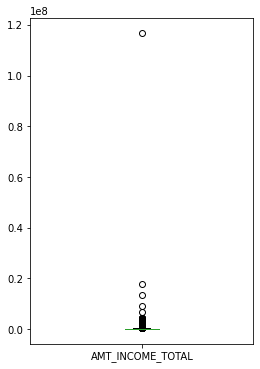

In [38]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

- Clearly we can see one outlier where the income is more than 100 million
- We can delete this entry because, it may affect the overall statistics metrics for the column as well as it might not be required to consider the analysis.

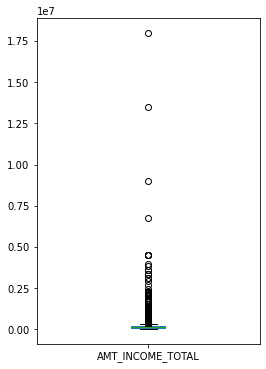

In [39]:
application_data = application_data[application_data.AMT_INCOME_TOTAL <= 100*pow(10,6)]

#Plot a box plot for this column once again

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

- Large amount of data is clustered between income of 0 to 2.5 million units.
- There are some exceptional cases/ outliers are present for the income greater than 5 million units income. So we will again consider the income range below 5 million for further analysis.

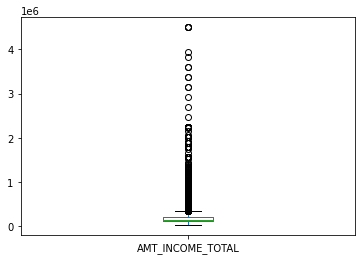

In [40]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 5*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

- Still there are some outliers/cases which should be eliminated.
- To do this, we can now analyze the AMT_INCOME_TOTAL below 1 million units and then take the decision for outliers.

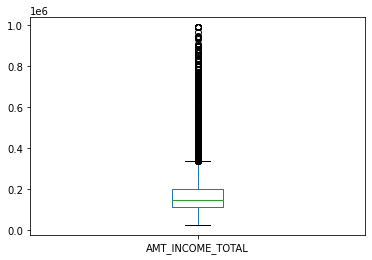

In [41]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 1*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

In [42]:
# This looks some appreciable distribution of the income values, where median is between 0.1 million to 0.2 million and 75% quantile is at 0.2 million.
# Eliminating the values that lie in the 99% to 100% quantile.

application_data = application_data[application_data.AMT_INCOME_TOTAL <= 1*pow(10,6)]

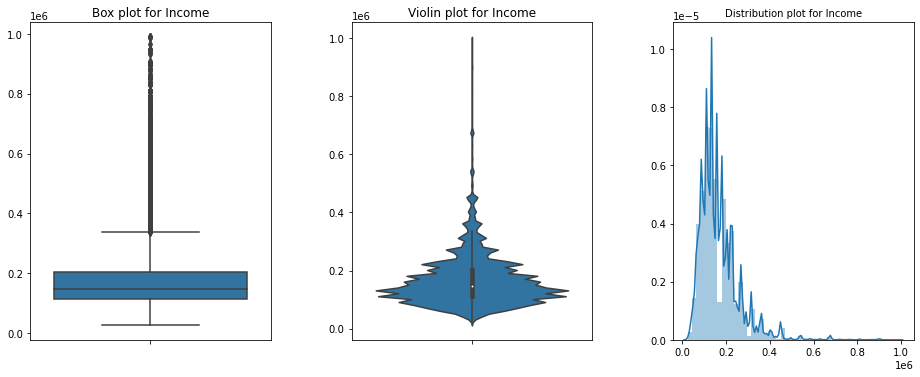

In [43]:
# Let's plot a box plot for AMT_INCOME_TOTAL
# Let's plot a violin plot for AMT_INCOME_TOTAL
# Let's plot a distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

sns.boxplot(application_data.AMT_INCOME_TOTAL,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.violinplot(application_data.AMT_INCOME_TOTAL,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Income')

sns.distplot(application_data.AMT_INCOME_TOTAL,ax=ax[2])
ax[2].set_title('Distribution plot for Income', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inference from the box plot
- Inference 1: From the box plot, we can say that median value is approximately at 0.15 million and 75% quantile is at 0.2 million and values ranging till 1 million which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that the data is more clustered between 0 and 0.2 million.
- Inference 3: Even though the data is clustered between 0 to 0.2M, the frequency of higher values is lower than the smaller values.

In [44]:
#Displaying the application data

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE  
0              1.0   Business Entity  
1              2.0            School  
2              1.0        Government  
3              2.0   Business Entity  
4              1.0          Religion

In [45]:
# Checking the number of final rows and columns again

application_data.shape

(306971, 19)

In [46]:
#Let's consider AMT_CREDIT column

application_data.AMT_CREDIT.describe()

count    3.069710e+05
mean     5.988585e+05
std      4.019353e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

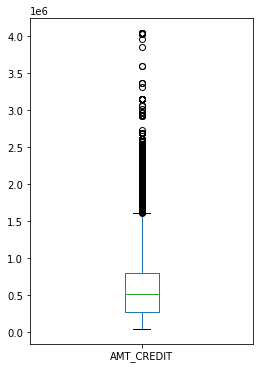

In [47]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

- There are some outliers which has value greater than 2.5 million, so we will consider only those values lesser than 2.5 for further analysis.

In [48]:
# Eliminating the values that are greater than 3.5 million

application_data = application_data[application_data.AMT_CREDIT <= 2.5*pow(10,6)]

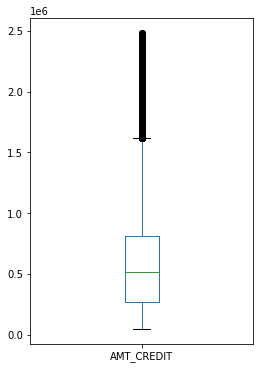

In [49]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

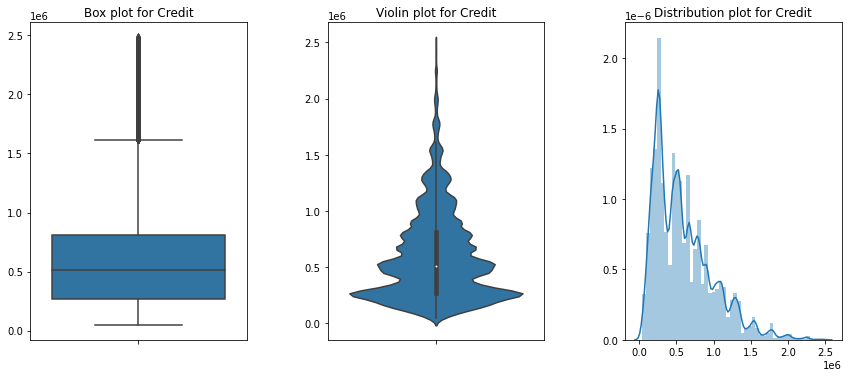

<Figure size 288x360 with 0 Axes>

In [50]:
# Let's plot a  box plot for AMT_CREDIT
# Let's plot a violin plot for AMT_CREDIT
# Let's plot a  distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(12,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,5])
sns.boxplot(application_data.AMT_CREDIT,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Credit')

sns.violinplot(application_data.AMT_CREDIT,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Credit')

sns.distplot(application_data.AMT_CREDIT,ax=ax[2])
ax[2].set_title('Distribution plot for Credit')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

### Inference from the box plot of Credit Amount
- Inference 1: From the box plot, we can say that median value is approximately at 0.5 million and 75% quantile is at 0.7 million and values ranging upto 2.5 million which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that the data is more clustered between 0 and 0.7 million, and then frequency is decreased afterwards.
- Inference 3: Even though the data is clustered between 0 to 0.4M, the frequency of higher credit values is lower than the smaller credit values.

In [51]:
#Displaying the application data

application_data.shape

(306618, 19)

In [52]:
# Let's consider the column AMT_ANNUITY for the outliers.

application_data.AMT_ANNUITY.describe()

count    306618.000000
mean      27041.113173
std       14322.435261
min        1615.500000
25%       16524.000000
50%       24894.000000
75%       34587.000000
max      225000.000000
Name: AMT_ANNUITY, dtype: float64

In [53]:
# Check the types of values present in the AMT_ANNUITY column.

application_data.AMT_ANNUITY.dtypes

dtype('float64')

In [54]:
# Let's check the values from the columns that are not integer or float.

odd_man_out_amt_annuity = application_data.AMT_ANNUITY.apply(lambda x: 1 if ((type(x)==int) or (type(x)==float))  else 0)
application_data[odd_man_out_amt_annuity == 0]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS, ORGANIZATION_TYPE]
Index: []

In [55]:
# Consider rows from AMT_ANNIUTY column where there are no objects.

application_data = application_data[odd_man_out_amt_annuity != 0]

In [56]:
# Let's convert the int values to float.

application_data.AMT_ANNUITY = application_data.AMT_ANNUITY.apply(lambda x: float(x))

In [57]:
# Check for the type of values in ANNUITY column again

application_data.AMT_ANNUITY.dtype

dtype('float64')

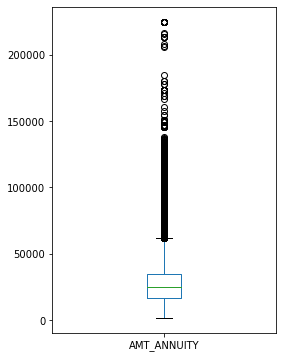

In [58]:
# Let's plot a box plot for the AMT_ANNUITY Column.

plt.figure(figsize=[4,6])
application_data.AMT_ANNUITY.plot.box()
plt.show()

In [59]:
#  Let's consider the data where AMT_ANNUITY value is < 120000 as remaining can affect our analysis.

application_data =  application_data[application_data.AMT_ANNUITY<120000]

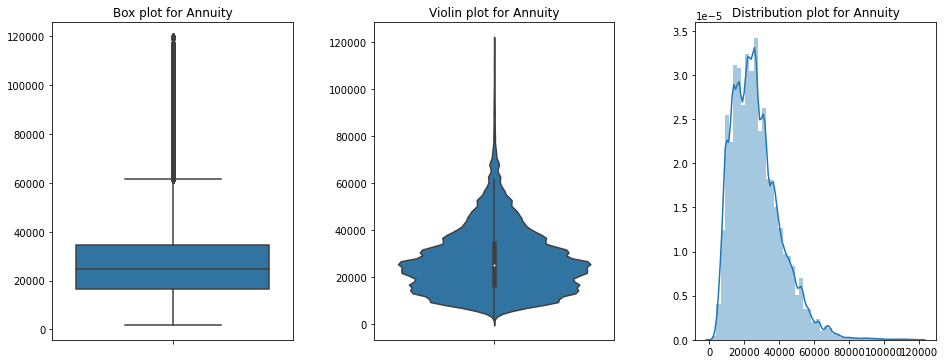

<Figure size 288x432 with 0 Axes>

In [60]:
# Let's plot a  box plot for AMT_ANNUITY
# Let's plot a violin plot for AMT_ANNUITY
# Let's plot a distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(application_data.AMT_ANNUITY,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Annuity')

sns.violinplot(application_data.AMT_ANNUITY,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Annuity')

sns.distplot(application_data.AMT_ANNUITY,ax=ax[2])
ax[2].set_title('Distribution plot for Annuity')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inference from the box plot of Annuity Amount
- Inference 1: From the box plot, we can say that median value is approximately at 30000 and 75% quantile is at 60000; values ranging upto 120000 which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that the data is more clustered between 0 and 60000, and then frequency is decreased afterwards.
- Inference 3: Even though the data is clustered between 0 to 60000, the frequency of higher annuity values is lower than the smaller annuity values.

In [61]:
# Let's consider the column AMT_GOODS_PRICE for the outliers.

application_data.AMT_GOODS_PRICE.describe()

count    3.064510e+05
mean     5.352040e+05
std      3.625000e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.475000e+06
Name: AMT_GOODS_PRICE, dtype: float64

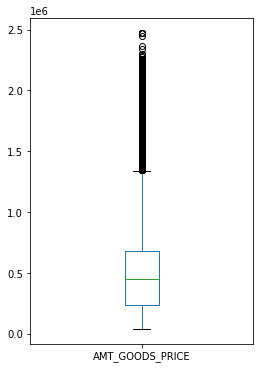

In [62]:
# Let's plot a box plot for the AMT_GOODS_PRICE Column

plt.figure(figsize=[4,6])
application_data.AMT_GOODS_PRICE.plot.box()
plt.show()

In [63]:
# Let's consider the values below 2 million units

application_data =  application_data[application_data.AMT_GOODS_PRICE<2*pow(10,6)]

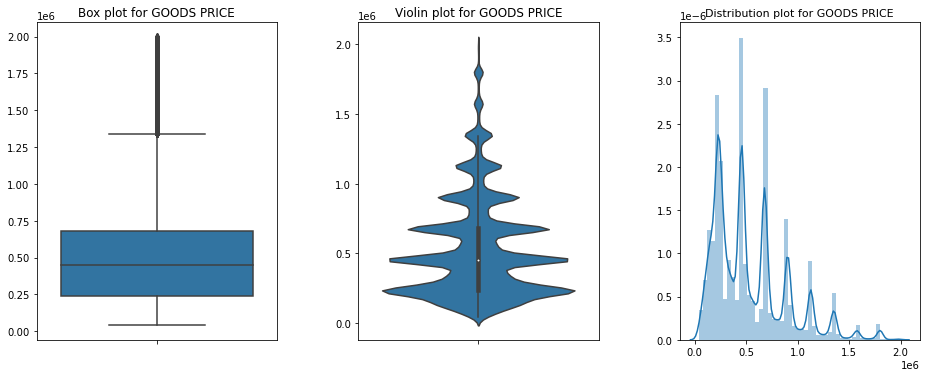

<Figure size 288x432 with 0 Axes>

In [64]:
# Let's plot a  box plot for AMT_GOODS_PRICE
# Let's plot a violin plot for AMT_GOODS_PRICE
# Let's plot a distribution plot for AMT_GOODS_PRICE

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(application_data.AMT_GOODS_PRICE,orient='v',ax=ax[0])
ax[0].set_title('Box plot for GOODS PRICE')

sns.violinplot(application_data.AMT_GOODS_PRICE,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for GOODS PRICE')

sns.distplot(application_data.AMT_GOODS_PRICE,ax=ax[2])
ax[2].set_title('Distribution plot for GOODS PRICE', fontsize=11)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inference from the box plot of Goods Price
- Inference 1: From the box plot, we can say that median value is approximately at 0.5 million and 75% quantile is at 0.60 million; values ranging upto 2 million which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that frequency of the goods price amount is decreasing in zig zag manner. It's highest between 0 to 0.5M and then decreasing with spikes in between.

In [65]:
# Let's display the data again for further analysis

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE  
0              1.0   Business Entity  
1              2.0            School  
2              1.0        Government  
3              2.0   Business Entity  
4              1.0          Religion

- Now let's analyze the outliers for DAYS_BIRTH and DAYS_EMPLOYED columns
- The values in this column are taken w.r.t date of application, so we have to change the sign of the numbers for understanding purpose.
- We can then convert days to years and then assign those to new columns.

In [66]:
# Check the statistical information of the DAYS_BIRTH columns

application_data.DAYS_BIRTH.describe()

count    305778.000000
mean     -16038.556587
std        4365.780321
min      -25201.000000
25%      -19685.000000
50%      -15752.000000
75%      -12412.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [67]:
# Check the statistical information of the DAYS_EMPLOYED columns

application_data.DAYS_EMPLOYED.describe()

count    305778.000000
mean      63983.964023
std      141413.949914
min      -17912.000000
25%       -2757.000000
50%       -1211.000000
75%        -287.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

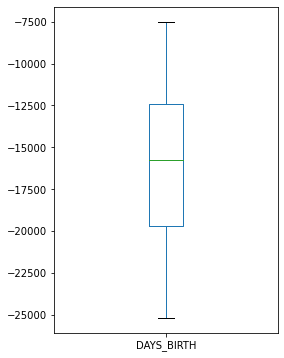

In [68]:
# Let's plot a  box plot for DAYS_BIRTH

plt.figure(figsize=[4,6])
application_data.DAYS_BIRTH.plot.box()
plt.show()

### Inferences from the box plot for Days Birth
- Inference 1: No outliers are observed from the boxplot of Days birth and thus outliers handling is not required in this case.

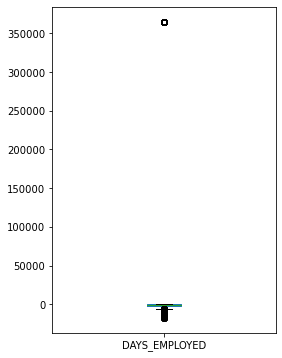

In [69]:
# Let's plot a  box plot for DAYS_EMPLOYED

plt.figure(figsize=[4,6])
application_data.DAYS_EMPLOYED.plot.box()
plt.show()

In [70]:
#Checking the percentage of values greater than 350000

(application_data[application_data.DAYS_EMPLOYED>=350000].shape[0]/application_data.shape[0])*100

18.052639496628274

- We can see there are some outliers which have values >350000, those can be positive infinity values
- We will keep those values as null because that may affect our analysis for the columns.
- Also, assigning that large number of values with median/mean may hamper our analysis, as the percentage of such values is very huge i.e. ~18%.

In [71]:
# We can see an outlier having >350000 value.  So we can ignore such values and keep those as null
# Converting those days values into years and then storing into new columns.

application_data['YEARS_BIRTH'] = application_data.DAYS_BIRTH.apply(lambda x: -x/365.0)
application_data.DAYS_EMPLOYED[application_data.DAYS_EMPLOYED > 350000] = np.NaN
application_data['YEARS_EMPLOYED'] = application_data.DAYS_EMPLOYED.apply(lambda x: -x/365.0)

In [72]:
# Deleting the days columns

del application_data['DAYS_BIRTH']
del application_data['DAYS_EMPLOYED']

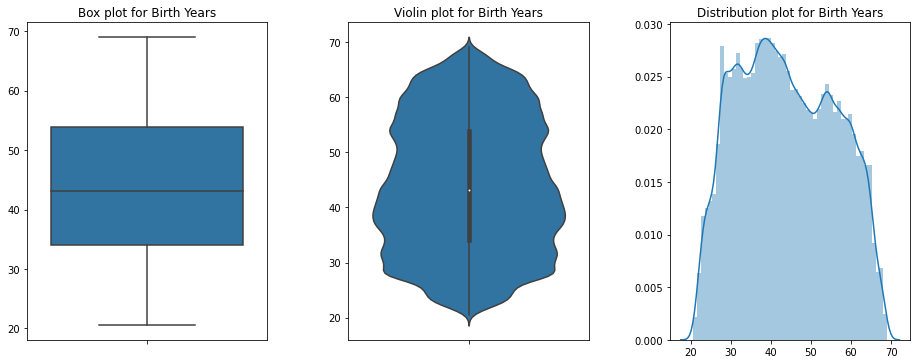

<Figure size 288x432 with 0 Axes>

In [73]:
# Let's plot a  box plot for YEARS_BIRTH
# Let's plot a violin plot for YEARS_BIRTH
# Let's plot a distribution plot for YEARS_BIRTH

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
# application_data.YEARS_BIRTH.plot.box()
sns.boxplot(application_data.YEARS_BIRTH,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Birth Years')

sns.violinplot(application_data.YEARS_BIRTH,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Birth Years')

sns.distplot(application_data.YEARS_BIRTH,ax=ax[2])
ax[2].set_title('Distribution plot for Birth Years', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inference from the box plot of Birth Years
- Inference 1: From the box plot, we can say that median value is approximately at 50% quantile, and the data is evenly spread.
- Inference 2: From the violin plot and distribution plot, we can say that the data is distributed uniformly as there are not sudden drops or any spikes in the distribution.
- Inference 3: Although, the frequency for the end values is less compared to mid values, that's why we can observe sudden spike at both start and the end in the histogram.

- The values are equally spread through out the data and there are no outliers present in the data, so we dont have to deal with it. 

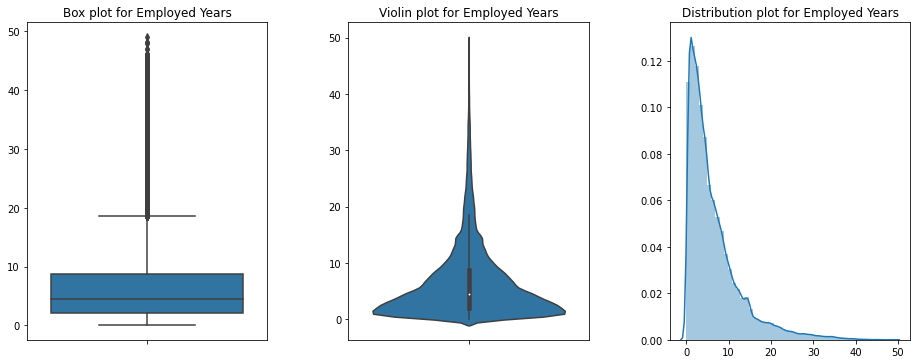

<Figure size 288x432 with 0 Axes>

In [74]:
# Let's plot a  box plot for YEARS_EMPLOYED
# Let's plot a violin plot for YEARS_EMPLOYED
# Let's plot a distribution plot for YEARS_BIRTH

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
# application_data.YEARS_BIRTH.plot.box()
sns.boxplot(application_data.YEARS_EMPLOYED,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Employed Years')

sns.violinplot(application_data.YEARS_EMPLOYED,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Employed Years')

sns.distplot(application_data.YEARS_EMPLOYED,ax=ax[2])
ax[2].set_title('Distribution plot for Employed Years', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

### Inference from the box plot of Employed Years
- Inference 1: From the box plot, we can say that median value is approximately at 4 years, 75% quantile data is at 10 years, and ranges upto 50 years..
- Inference 2: From the violin plot and distribution plot, we can say that the data is clustered in large percentage between 0 to 10 years and the frequency of the years more than 10 is decreasing till the end.


- Now the data imbalance is reduced significantly after replacing the outliers. We will proceed with further analysis.

## Univariate Analysis for Columns
- We will now analyze the data spread across individual columns and create some better visualizations.
- We will use various graphs such as bar graph, pie charts, histograms if required.

In [75]:
# Displaying the data again

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment              1.0   Business Entity   
1               Married  House / apartment              2.0            School   
2  Single / not married  House / apartment              1.0        Government   
3        Civil marriage  House / apartment              2.0   Business Entity   
4  Single / not married  House / apartment              1.0          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

## Analyzing Target customers

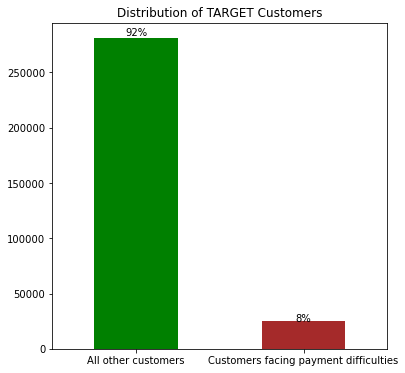

In [76]:
# Let's analyze how targeted customers are spread across the data

plt.figure(figsize=[6,6])
targets = application_data.TARGET.value_counts()
graph = targets.plot.bar(color=['G','brown'])
plt.xticks([0,1],['All other customers','Customers facing payment difficulties'],rotation=0)
graph.set_title("Distribution of TARGET Customers")

for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/targets.sum():.0%}', (x + width/2, y + height*1.01), ha='center')
plt.show()

### Inference from the Box Plot
- Inference 1: The no. of customers facing payment issues is significantly less than the customers facing no difficulties (all other cases in our sample).
- Inference 2: 92% of the customers are not facing any payment difficulties and may not likely to default, where as 8% of the customers are facing payment difficulties and likely to default.

Now we need to understand how consumer attributes and loan attributes influence the tendency of default which will be required by the company for its risk assessment.
Let's proceed further for univariate analysis.

## Analysis of customers for Loan Types, Genders, Owning Cars and Owning Flats

In [77]:
# Let's analyze the genders of the customers

application_data.CODE_GENDER.value_counts()

F      201483
M      104291
XNA         4
Name: CODE_GENDER, dtype: int64

In [78]:
# We have found there are some XNA values are present in Gender Category.
# we will remove those as there are very less count of such values are present (May be outliers or unknown).

application_data.CODE_GENDER = application_data.CODE_GENDER.apply(lambda x: np.NaN if x=='XNA' else x)
application_data.CODE_GENDER = application_data.CODE_GENDER[~application_data.CODE_GENDER.isnull()]
application_data.CODE_GENDER.value_counts()

F    201483
M    104291
Name: CODE_GENDER, dtype: int64

In [79]:
# Let's analyze the loan types 

application_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         276892
Revolving loans     28886
Name: NAME_CONTRACT_TYPE, dtype: int64

In [80]:
# Let's analyze the column containing customers having cars or not 

application_data.FLAG_OWN_CAR.value_counts()

N    202026
Y    103752
Name: FLAG_OWN_CAR, dtype: int64

In [81]:
# Let's analyze the column containing customers having flats or not 

application_data.FLAG_OWN_REALTY.value_counts()

Y    212308
N     93470
Name: FLAG_OWN_REALTY, dtype: int64

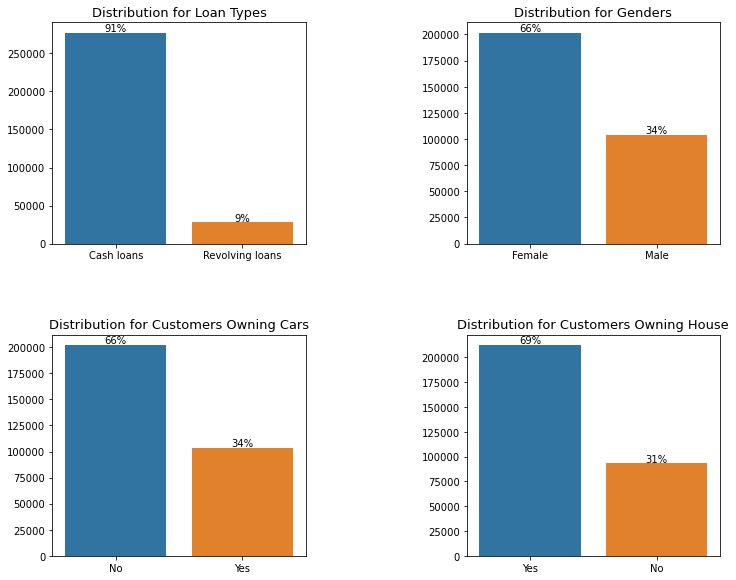

In [82]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Loan Types, Genders, Owning Cars and Owning Flats.

fig, ax = plt.subplots(2, 2, figsize=(10,8))
# Making a plot with 2 subplots

loan_types = application_data.NAME_CONTRACT_TYPE.value_counts()
genders = application_data.CODE_GENDER.value_counts()
owns_cars = application_data.FLAG_OWN_CAR.value_counts()
own_reality = application_data.FLAG_OWN_REALTY.value_counts()

fig.tight_layout(h_pad=7,w_pad=13)
sns.barplot(x=loan_types.index, y=loan_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Loan Types", fontsize=13)
sns.barplot(x=genders.index, y=genders, ax=ax[0][1])
ax[0][1].set_title("Distribution for Genders", fontsize=13)
ax[0][1].set_xticklabels(['Female','Male'])
sns.barplot(x=owns_cars.index, y=owns_cars, ax=ax[1][0])
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=13)
ax[1][0].set_xticklabels(['No','Yes'])
sns.barplot(x=own_reality.index, y=own_reality, ax=ax[1][1])
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=13)
ax[1][1].set_xticklabels(['Yes','No'])

graphs = [loan_types,genders,owns_cars,own_reality]
count = 0
for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/graphs[count].sum():.0%}', (x + width/2, y + height*1.01), ha='center')
    count+=1
plt.show()

### Inferences drawn from the Bar Graphs
- From  *Distribution of Loan types* plot we can say that customers are taking more cash loans i.e. personal or business loans in cash. Very less people are going for revolving loans although it is more flexible. `91% are customers taking Cash Loans, where as the 9% are the people taking Revolving Loans.`
- From  *Distribution of Genders* plot it can be observed that Female borrowers are more way more than male. `91% are customers are males and 34% customers are female.`
- From  *Distribution of Owning Cars* plot we can see that less customers are having cars. So peoples having having cars don't opt for loans much.:) `66% customers Owns car, where as 34% customers don't own cars.`
- From  *Distribution of Owning House* plot we can say that majority of the customers (about 70 % ) are having their own house. `31% people Owns house, where as 69% of people owns flat.`

## Analysis of the children count spread across the data

In [83]:
# Let's analyze the children count spread across the data
application_data.CNT_CHILDREN.value_counts()

0     214158
1      60769
2      26605
3       3697
4        423
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [84]:
# There are some exceptional cases here now, as those who customers have children more than 10 are very less in count. 
# So we can ignore those values.
application_data = application_data[application_data.CNT_CHILDREN<=10]
application_data.CNT_CHILDREN.value_counts()

0     214158
1      60769
2      26605
3       3697
4        423
5         84
6         21
7          7
10         2
9          2
8          2
Name: CNT_CHILDREN, dtype: int64

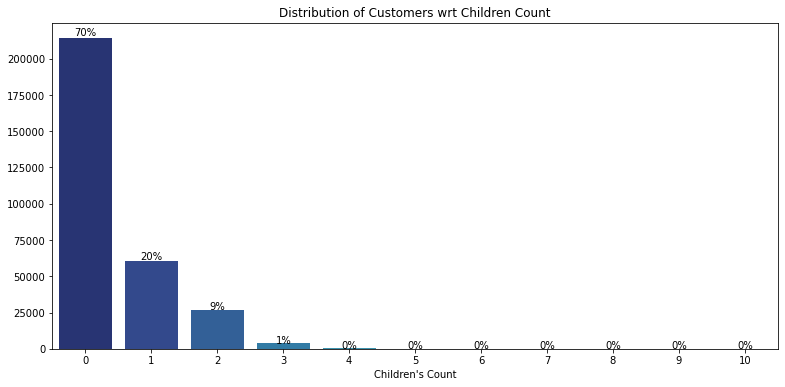

In [85]:
# Let's analyze how distribution is spread across the customers with respect to Children Count
plt.figure(figsize=[13,6])
counts = application_data.CNT_CHILDREN.value_counts()
graph = sns.barplot(x = counts.index, y = counts, palette='YlGnBu_r')
plt.xticks(rotation=0)
graph.set_title("Distribution of Customers wrt Children Count")
plt.xlabel('Children\'s Count')
plt.ylabel('')

for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/counts.sum():.0%}', (x + width/2, y + height*1.01), ha='center')
plt.show()

### Inferences from the Bar Plot for Children's Count
- No. of customers having no children is highest (almost 70%). Thus we can guess that may be majority of the customers having loans are unmarried and without family, may be students and young working professionals.
- The percentage of people gradually decreases as the children count increases.

## Analysis of customers for Income Types, Family Status, Education Types, Housing Types

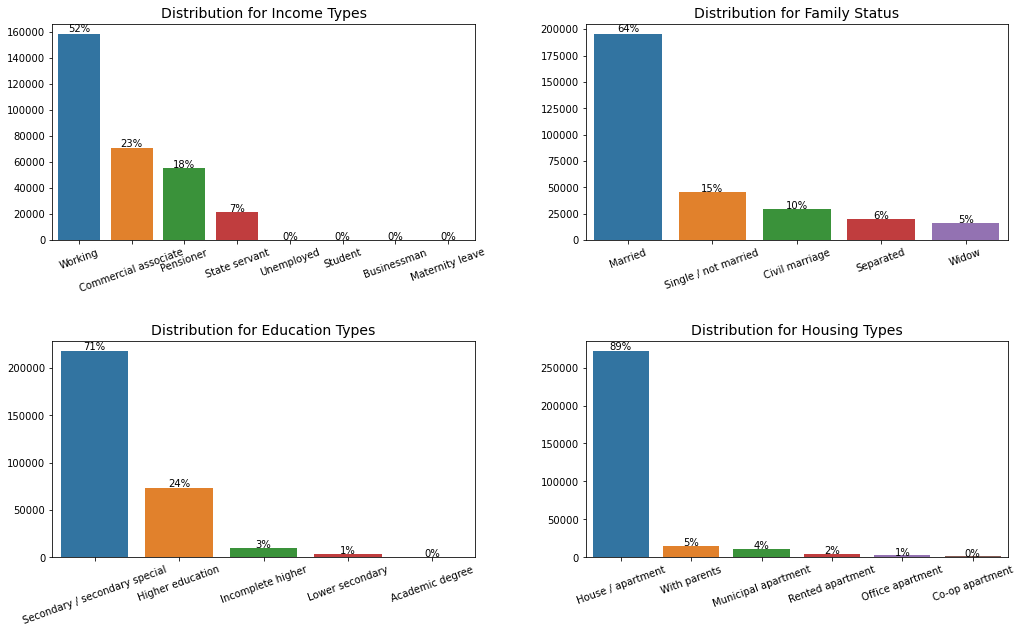

In [86]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Income Types, Family Status, Education Types, Housing Types.

fig, ax = plt.subplots(2, 2, figsize=(14,8))
# Making a plot with 2 subplots

income_types    = application_data.NAME_INCOME_TYPE.value_counts()
family_status   = application_data.NAME_FAMILY_STATUS.value_counts()
education_types = application_data.NAME_EDUCATION_TYPE.value_counts()
housing_types   = application_data.NAME_HOUSING_TYPE.value_counts()

fig.tight_layout(h_pad=8,w_pad=8)
sns.barplot(x=income_types.index, y=income_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Income Types", fontsize=14)
sns.barplot(x=family_status.index, y=family_status, ax=ax[0][1])
ax[0][1].set_title("Distribution for Family Status", fontsize=14)
sns.barplot(x=education_types.index, y=education_types, ax=ax[1][0])
ax[1][0].set_title("Distribution for Education Types", fontsize=14)
sns.barplot(x=housing_types.index, y=housing_types, ax=ax[1][1])
ax[1][1].set_title("Distribution for Housing Types", fontsize=14)

graphs = [income_types,family_status,education_types,housing_types]
count = 0
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('')
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/graphs[count].sum():.0%}', (x + width/2, y + height*1.01), ha='center')
    count+=1
plt.show()

### Inferences from the Bar Graphs
- From the *Distribution of income types* plot we can infer that customers are mostly working professionals followed by commercial associate, pensioner, state servant, unemployed, student, businessman, maternity leave. Two possibilities can be there in the income types having less no. of customers   - 1. They have been rejected 2. They canceled it or may be didn't opt for loans. For example unemployed would likely to be rejected by the company. 52% of the customers are working professionals.
- From the *Distribution of Family status* plot we can see that mostly married customers are present. There is a significant difference between the counts of married , unmarried and other categories. So or last inference from children count plot wont stand out. Therefore combining both we can say that no. of married customers having no children is highest. 64% of the customers are married.
- From the *Distribution of education types* plot it can be observed that majority of the customers are having secondary eduction. Highly educated are less in no. 71% of the customers have completed secondary/secondary special.
- From the *Distribution of Housing types* plot we can see that maximum customers are having house or apartments of their own which we already got an idea from the owning realty variable. People staying in rented apartments, office apartments and co-operative apartments are less in number. 89% of the customers have house/apartment as housing type. 

In [87]:
# Displaying the application data dataframe 

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment              1.0   Business Entity   
1               Married  House / apartment              2.0            School   
2  Single / not married  House / apartment              1.0        Government   
3        Civil marriage  House / apartment              2.0   Business Entity   
4  Single / not married  House / apartment              1.0          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

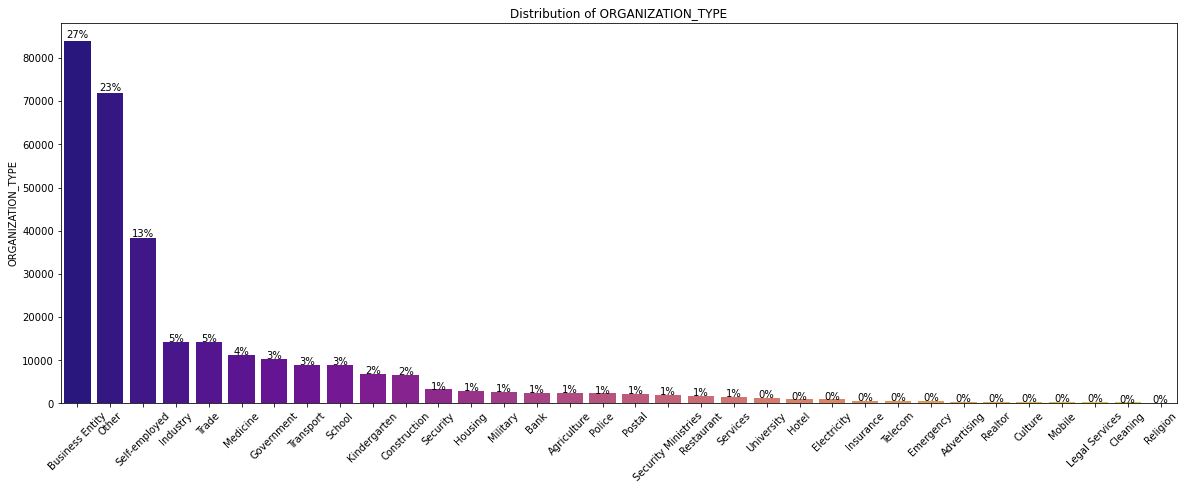

In [88]:
# Let's analyze how ORGANIZATION_TYPE types are spread across the data

plt.figure(figsize=[20,7])
counts = application_data.ORGANIZATION_TYPE.value_counts()
graph = sns.barplot(x = counts.index, y = counts, palette="plasma")
plt.xticks(rotation=45)
graph.set_title("Distribution of ORGANIZATION_TYPE")
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/counts.sum():.0%}', (x + width/2, y + height*1.01), ha='center')

plt.show()

### Inferences from the Bar Graph
- From *Distribution of Organization Type* it can be observed that Business Entity is the organization type having the highest number of customer and Religion having the least. 
- 27% of the customers have business entity as the organization type. 

In [89]:
# Displaying the application data dataframe 

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment              1.0   Business Entity   
1               Married  House / apartment              2.0            School   
2  Single / not married  House / apartment              1.0        Government   
3        Civil marriage  House / apartment              2.0   Business Entity   
4  Single / not married  House / apartment              1.0          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

## Analysis of the family member's count column

In [90]:
# Let's analyze the family member's count column

application_data.CNT_FAM_MEMBERS.value_counts()

2.0     157381
1.0      67557
3.0      52294
4.0      24564
5.0       3458
6.0        403
7.0         81
8.0         20
9.0          6
10.0         3
12.0         2
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [91]:
# We will change the type of the column from float to int
    
application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.astype('int')
application_data.CNT_FAM_MEMBERS.value_counts()

2     157381
1      67557
3      52294
4      24564
5       3458
6        403
7         81
8         20
9          6
10         3
12         2
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

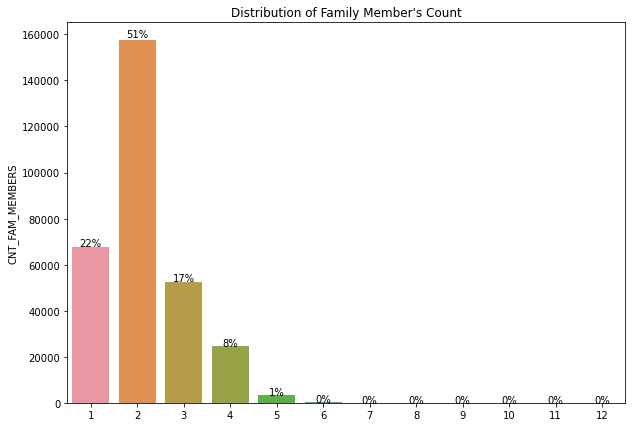

In [92]:
# Let's plot a bar graph for to visualize the districution

plt.figure(figsize=[10,7])
counts = application_data.CNT_FAM_MEMBERS.value_counts()
graph = sns.barplot(x = counts.index, y = counts)
plt.xticks(rotation=0)
graph.set_title("Distribution of Family Member's Count")
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/counts.sum():.0%}', (x + width/2, y + height*1.01), ha='center')
plt.show()

### Inferences from the Bar Graph of Family Member's Count
- Although number of family members ranges from 1 to 12, no, of customers having 2 family members is maximum.
- Almost 51% of the families have 2 family members and 22% of the families have 1 family members (Probably singles).

In [93]:
# Didplaying the application data dataframe

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

In [94]:
# Let's check the shape before heading towards bivariate analysis

application_data.shape

(305770, 19)

# Bivariate and Multivariate Analysis w.r.t. Target Variable
- We will analyze the Target column with all other columns one by one to create visualizations.
- We can determine which columns to consider for bivariate analysis using correlation of the columns with the Target Column.
- We can analyze and  visualize  the distribution of the driving factors behind loan defaults across the customers who are facing difficulties and all other cases.
- We can thus determine what are the probable indicators that may lead the customers to default.

- We will split the data w.r.t. Target Variables into two different dataframes, so that it will be easier to compare multiple factors that may affect the target variable.

In [95]:
# We will split the data into two categories: clients facing difficulties and all other types, so that we can draw inferences for both the types easily

customers_facing_difficulties = application_data[application_data.TARGET == 1]
all_other_types_customers = application_data[application_data.TARGET == 0]

In [96]:
# Let's display the final cleaned data

application_data.head(7)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   

   AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0               Working  Secondary / secondary special   
1        1129500.0         State servant               Higher education   
2         135000.0               Working  Secondary / secondary special   
3         297000.0               Working  Secondary / secondary special   
4         513000.0               Working  Secondary / secondary special   
5         454500.0         State servant  Secondary / secondary special   
6        1395000.0  Commercial associate               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   
5               Married  House / apartment                2             Other   
6               Married  House / apartment                3   Business Entity   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288  
5    46.413699        4.350685  
6    37.747945        8.575342

In [97]:
# Finding correlations with the target and sorted 

correlations= application_data.corr()['TARGET'].sort_values()

#Display the correlations

print(correlations)

YEARS_BIRTH        -0.078623
YEARS_EMPLOYED     -0.074849
AMT_GOODS_PRICE    -0.037633
AMT_CREDIT         -0.028100
AMT_INCOME_TOTAL   -0.021420
AMT_ANNUITY        -0.009876
SK_ID_CURR         -0.002085
CNT_FAM_MEMBERS     0.009336
CNT_CHILDREN        0.019260
TARGET              1.000000
Name: TARGET, dtype: float64


### Inferences from the Correlation Values:
- Although Pearson correlation coefficient  is not the greatest method to represent relevance, but it can give us some ideas of possible relationships within the data.
- We can see that, years birth is negatively correlated with higher percentage to Target Variable.
- Annuity, Owning House and Children count is related with lower percentage that means there is no strong relation between Target and those columns.

- However, this is just a single factor that can lead to wrong insights, we have to consider the combination of several other factors that may affect the target variable.

### Analysis for number of customers on the basis of Loan Types, Gender, Owning Cars and Owning House w.r.t Target Variables.

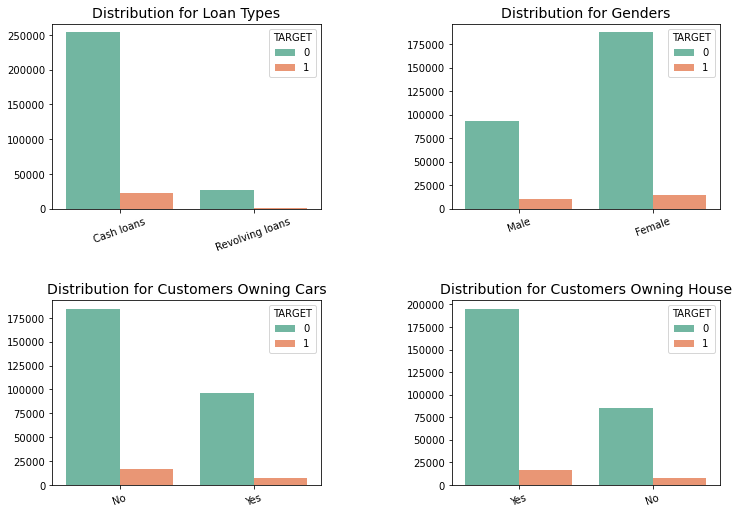

In [98]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns
# There plots contain analysis of Target Vs Contract Type, Gender, Whether Customer Owns car or not, Whether Customer owns a house/flat.

fig, ax = plt.subplots(2, 2, figsize=(10,7))
# Making a plot with 2 subplots


fig.tight_layout(h_pad=7,w_pad=10)
sns.countplot(x=application_data.NAME_CONTRACT_TYPE, hue = application_data.TARGET, ax=ax[0][0], palette = "Set2")
ax[0][0].set_title("Distribution for Loan Types", fontsize=14)
sns.countplot(x=application_data.CODE_GENDER, hue = application_data.TARGET, ax=ax[0][1], palette = "Set2")
ax[0][1].set_title("Distribution for Genders", fontsize=14)
ax[0][1].set_xticklabels(['Male','Female'])
sns.countplot(x=application_data.FLAG_OWN_CAR, hue = application_data.TARGET, ax=ax[1][0], palette = "Set2")
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=14)
ax[1][0].set_xticklabels(['No','Yes'])
sns.countplot(x=application_data.FLAG_OWN_REALTY, hue = application_data.TARGET, ax=ax[1][1], palette = "Set2")
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=14)
ax[1][1].set_xticklabels(['Yes','No'])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inferences from the above bar graphs:
- Inference 1: Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

- Inference 2: The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans( around 10%), comparing with women( around 7%).

- Inference 3: The customers that own a car are almost a half of the ones that doesn't own one. The customers that own a car are less likely to not repay the loan  than the ones that doesn't own. Both categories have not-repayment rates around 8%-9%.

- Inference 4: The customers that own real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

### Analysis for distribution of goods, annuity, credit and income amount for Target Variable

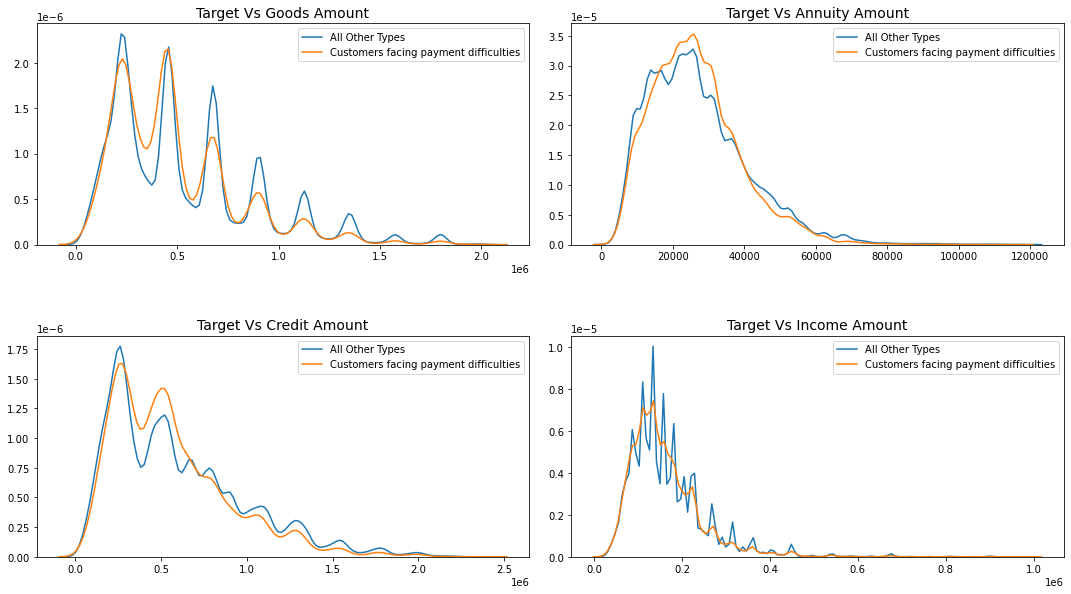

In [99]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns.
# There plots contain analysis of Target Vs Amount Goods Price, Amount Annuity Price, Amount Credit, Amount Income Total

fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=7)

sns.distplot(application_data[application_data.TARGET == 0].AMT_GOODS_PRICE,hist=False, label="All Other Types", ax=ax[0][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_GOODS_PRICE,hist=False, label="Customers facing payment difficulties", ax=ax[0][0])
ax[0][0].set_title("Target Vs Goods Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_ANNUITY,hist=False, label="All Other Types", ax=ax[0][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_ANNUITY,hist=False, label="Customers facing payment difficulties", ax=ax[0][1])
ax[0][1].set_title("Target Vs Annuity Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_CREDIT,hist=False, label="All Other Types", ax=ax[1][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_CREDIT,hist=False, label="Customers facing payment difficulties", ax=ax[1][0])
ax[1][0].set_title("Target Vs Credit Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_INCOME_TOTAL,hist=False, label="All Other Types", ax=ax[1][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_INCOME_TOTAL,hist=False, label="Customers facing payment difficulties", ax=ax[1][1])
ax[1][1].set_title("Target Vs Income Amount", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()


### Inference from the above Distribution Plots against Target Variables:
- Inference 1: In general, we can't see any significant patterns to analyze, as both the target==1 and target==0 curves showing almost similar plot pattern. However there is slightly different pattern observed from the distribution plots.
- Inference 2: Those who have annuity amount between 20000 to 40000, the default behavior observed is more as compared to all other cases.
- Inference 3: Those who have credit amount near 0.5M are likely to default more as compared to other cases.

### Analysis for distribution for birth and employment years for Target Variables

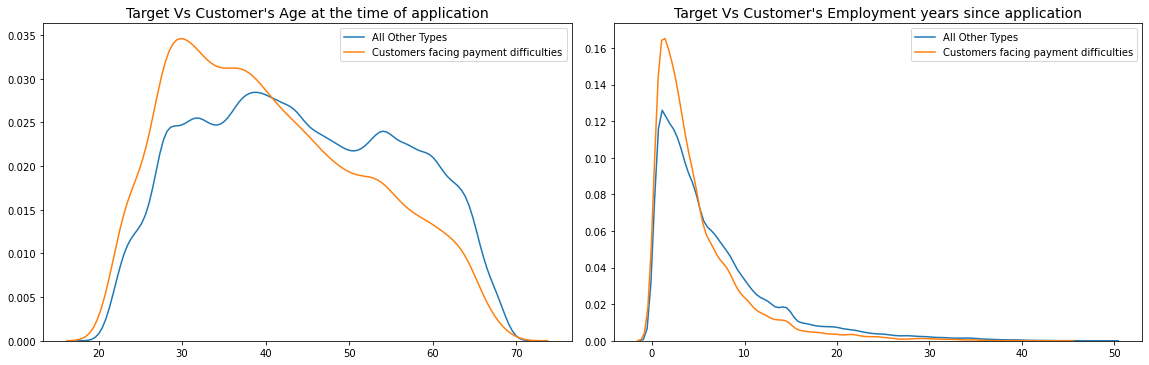

In [100]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns
# There plots contain analysis of Target Vs YEARS_BIRTH, YEARS_EMPLOYED

fig, ax = plt.subplots(1, 2, figsize=(16,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=7)

sns.distplot(application_data[application_data.TARGET == 0].YEARS_BIRTH,hist=False, label="All Other Types", ax=ax[0])
sns.distplot(application_data[application_data.TARGET == 1].YEARS_BIRTH,hist=False, label="Customers facing payment difficulties", ax=ax[0])
ax[0].set_title("Target Vs Customer's Age at the time of application", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].YEARS_EMPLOYED,hist=False, label="All Other Types", ax=ax[1])
sns.distplot(application_data[application_data.TARGET == 1].YEARS_EMPLOYED,hist=False, label="Customers facing payment difficulties", ax=ax[1])
ax[1].set_title("Target Vs Customer's Employment years since application", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inferences from the above distribution plots for Birth years and Employment Years:
- Inference 1: From *Target Vs Customer's Age at the time of application* plot, The target ==1 curve skews towards the younger end of range. Although years birth doesnot have much significant correlation with the target (-0.07), this variable is likely going to be useful in machine learning model because it affects the target. And from the Target==0 curve, it can be seen that as the customer gets older, there is a negative linear relationship with the target that means as the customer gets older, they tend to repay their loans on time and younger applicants are more likely to not repay the loans.

- Inference 2: From *Target Vs Customers's Employment Age at the time of application* plot both of the target==1 and target==0 skews towards the lesser no. of employment years. In this case also it doesnot have much significant correlation with the target (-0.07).

In [101]:
# Let's display the head again

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

In [102]:
def plot_target_categorical_vs_categorical(x):
    fig, ax = plt.subplots(4, 2, figsize=(12,18))
    # Making a plot with 2 subplots
    fig.tight_layout(h_pad=10,w_pad=5)
    
    fig.set_constrained_layout(True)
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.NAME_CONTRACT_TYPE,ax=ax[0][0])
    ax[0][0].set_title('No. of Customers Likely to Default Vs Loan Types')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.NAME_CONTRACT_TYPE,ax=ax[0][1])
    ax[0][1].set_title('No. of Customers NOT Likely to Default Vs Loan Types')
    
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.CODE_GENDER,ax=ax[1][0])
    ax[1][0].set_title('No. of Customers Likely to Default Vs Gender')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.CODE_GENDER,ax=ax[1][1])
    ax[1][1].set_title('No. of Customers NOT Likely to Default Vs Gender')
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.FLAG_OWN_CAR,ax=ax[2][0])
    ax[2][0].set_title('No. of Customers Likely to Default Vs Owns Car')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.FLAG_OWN_CAR,ax=ax[2][1])
    ax[2][1].set_title('No. of Customers NOT Likely to Default Vs Owns Car')
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.FLAG_OWN_REALTY,ax=ax[3][0])
    ax[3][0].set_title('No. of Customers Likely to Default Vs Owns House')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.FLAG_OWN_REALTY,ax=ax[3][1])
    ax[3][1].set_title('No. of Customers NOT Likely to Default Vs Owns House')
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=35)
        plt.legend(loc='upper right')
        plt.ylabel('')
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]
        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            if height_l/total > 0 and height_r/total>0:
                ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
                ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    plt.show()

#### Distribution of Income Type in different categories like Loan Types, Gender, Owns Car, Owns House for Target Variable

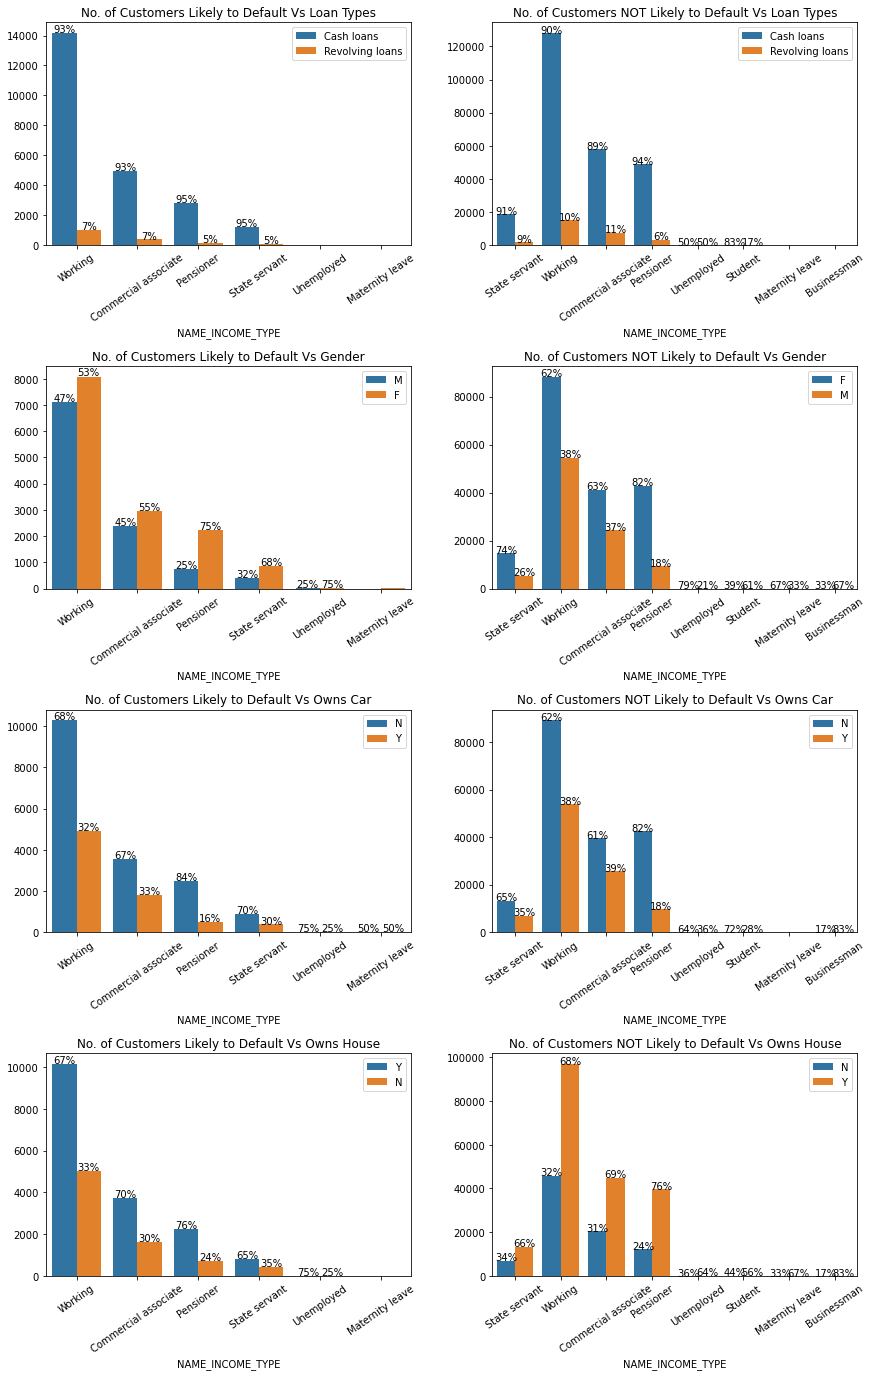

In [103]:
plot_target_categorical_vs_categorical('NAME_INCOME_TYPE')

### Inferences drawn from the plots for Income Type in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar, however in general the percentage of customer for who have Revolving Loans and NOT likely to default are greater than that of those who are likely to default.
- Compared with 'Gender', 'Working' and 'Pensioner' male are more likely to default than female.
- Compared whether 'Owns Car', the distribution is almost similar, except the 'Pensioner' who doesn't own car are NOT likely to default.
- Compared whether "Owns House',  the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of Family Status in different categories like Loan Types, Gender, Owns Car, Owns House for Targer Variable

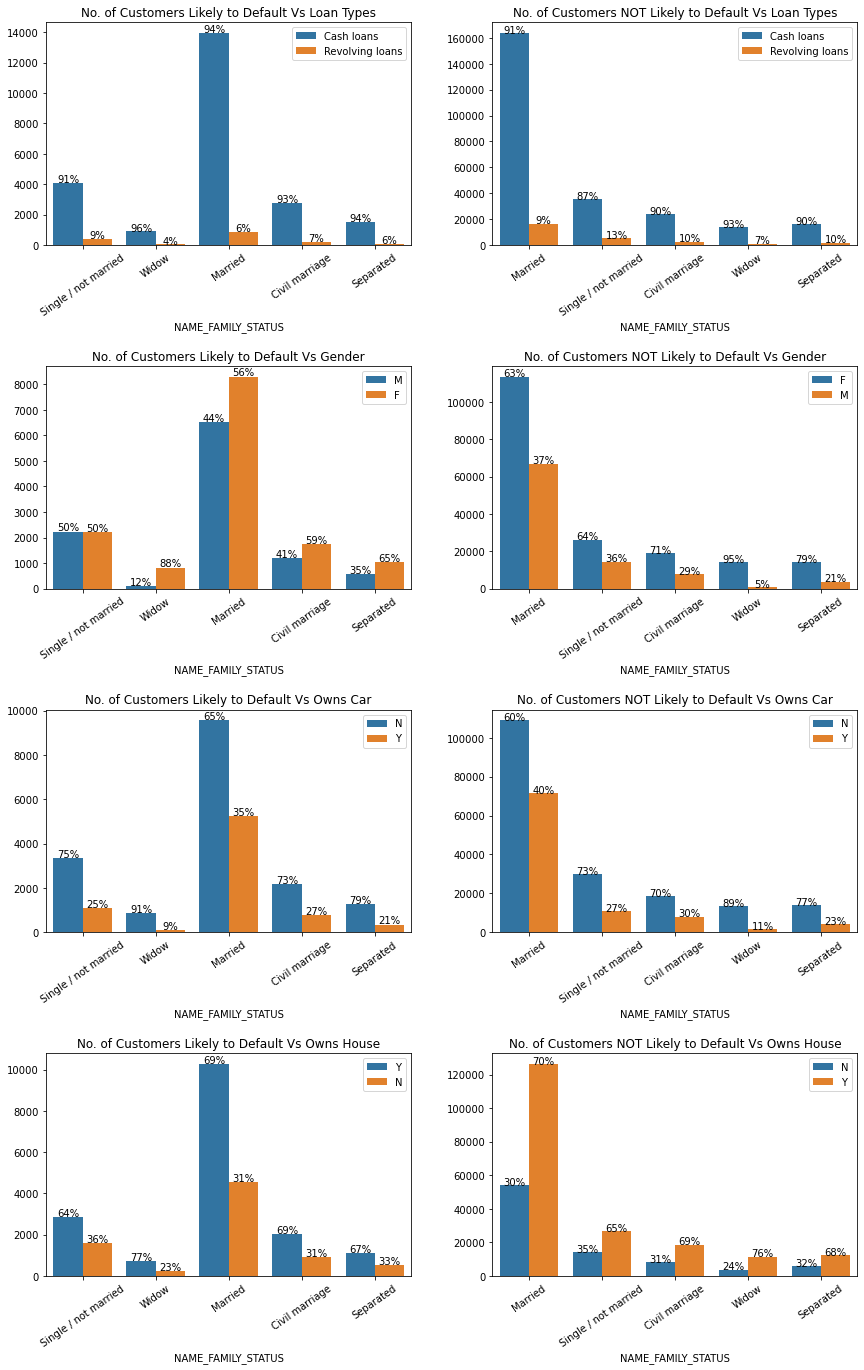

In [104]:
plot_target_categorical_vs_categorical('NAME_FAMILY_STATUS')

### Inferences drawn from the plots for Family Status in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. Those who have Cash Loans are more likely to default.
- Compared with 'Gender', the distribution is almost similar, however 'Single' and 'Separated' females are more NOT likely to default than that of male. I(n general, Female percentage in each category for NOT likely to default is slightly more.)
- Compared whether 'Owns Car', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.
- Compared whether 'Owns House', the distribution is almost similar, except the 'Married' who owns house are NOT likely to default.

### Distribution of Education Types in different categories like Loan Types, Gender, Owns Car, Owns House for Target Variable

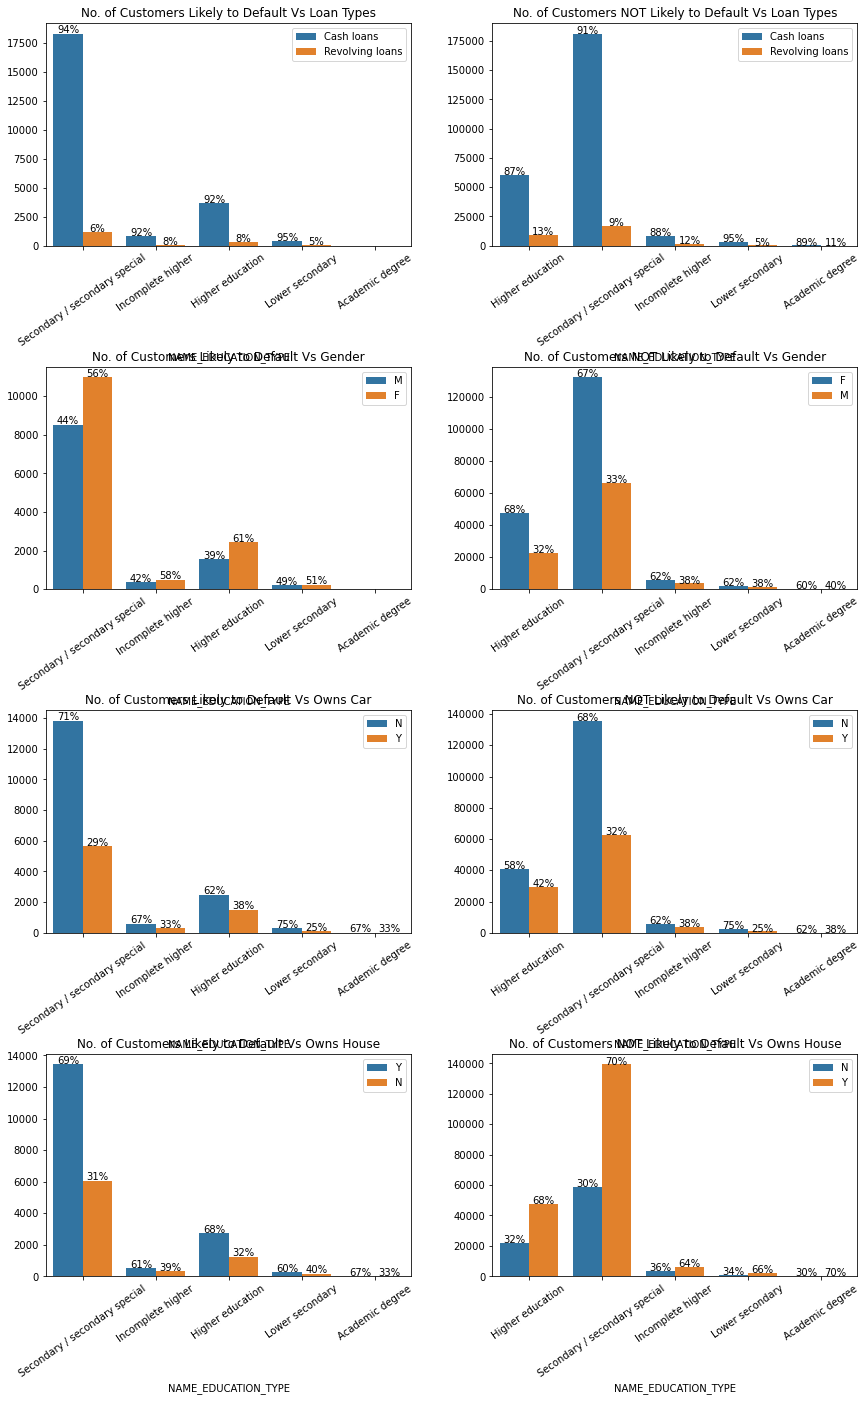

In [105]:
plot_target_categorical_vs_categorical('NAME_EDUCATION_TYPE')

### Inferences drawn from the plots for Education Types in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are more likely to default than those who are having Revolving Loans.
- Compared with 'Gender', similar pattern is observed however, lower secondary females are more likely to default compared to lower secondary males.
- Compared whether 'Owns Car', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of NAME_HOUSING_TYPE in different categories like Loan Types, Gender, Owns Car, Owns House for Target Variable

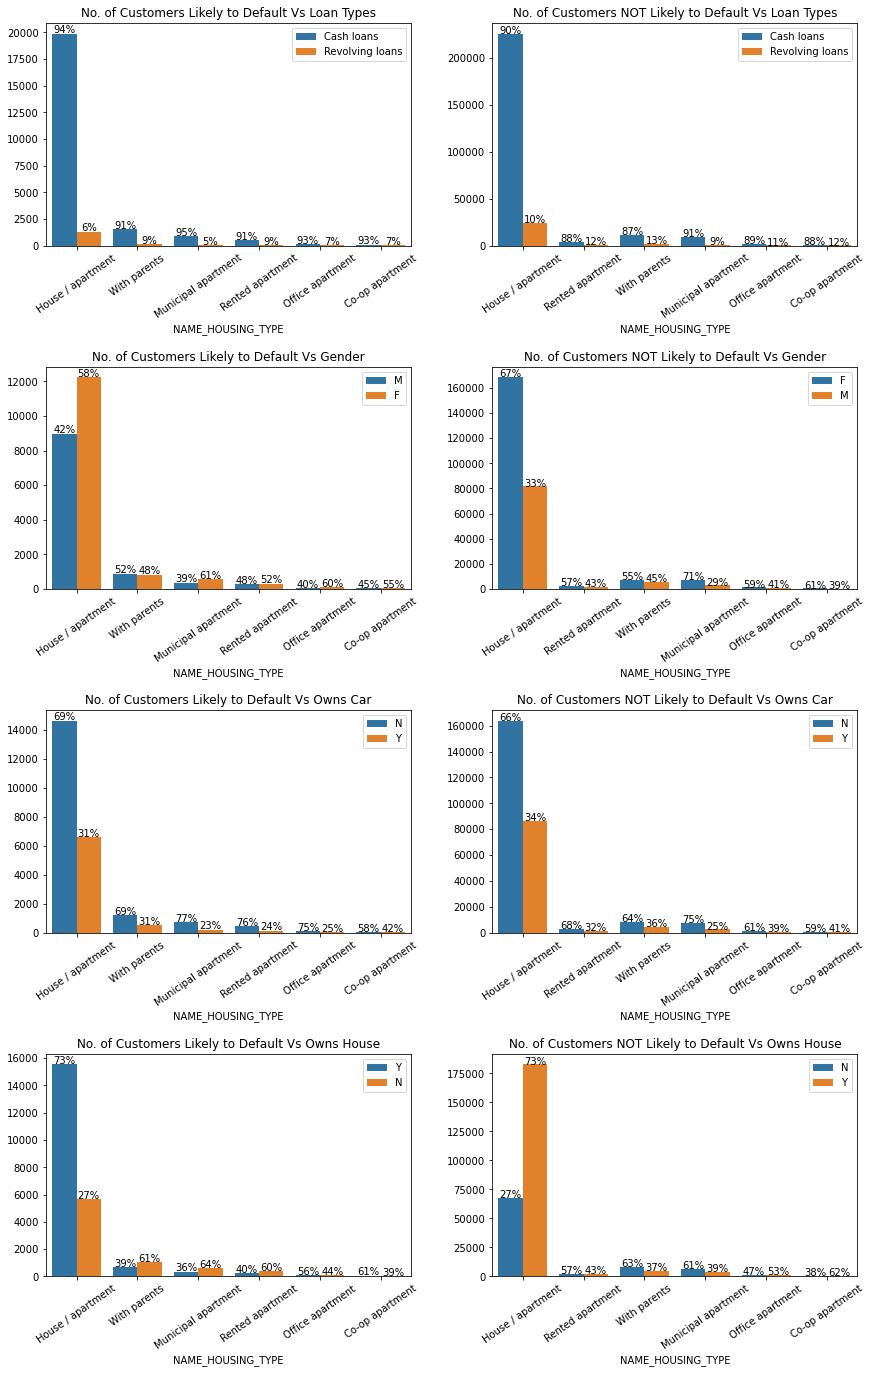

In [106]:
plot_target_categorical_vs_categorical('NAME_HOUSING_TYPE')

### Inferences drawn from the plots for Housing Types in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are more likely to default than those who are having Revolving Loans.
- Compared with 'Gender', similar pattern is observed however, in general Females who lives in House Apartment and Municipal Apartment are slightly LESS likely to default.
- Compared whether 'Owns Car', the distribution is almost similar but who owns car and lives in rented apartment are MORE likely to default.
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of Family Member's Count in different categories like Loan Types, Gender, Owns Car, Owns House for Target Variable

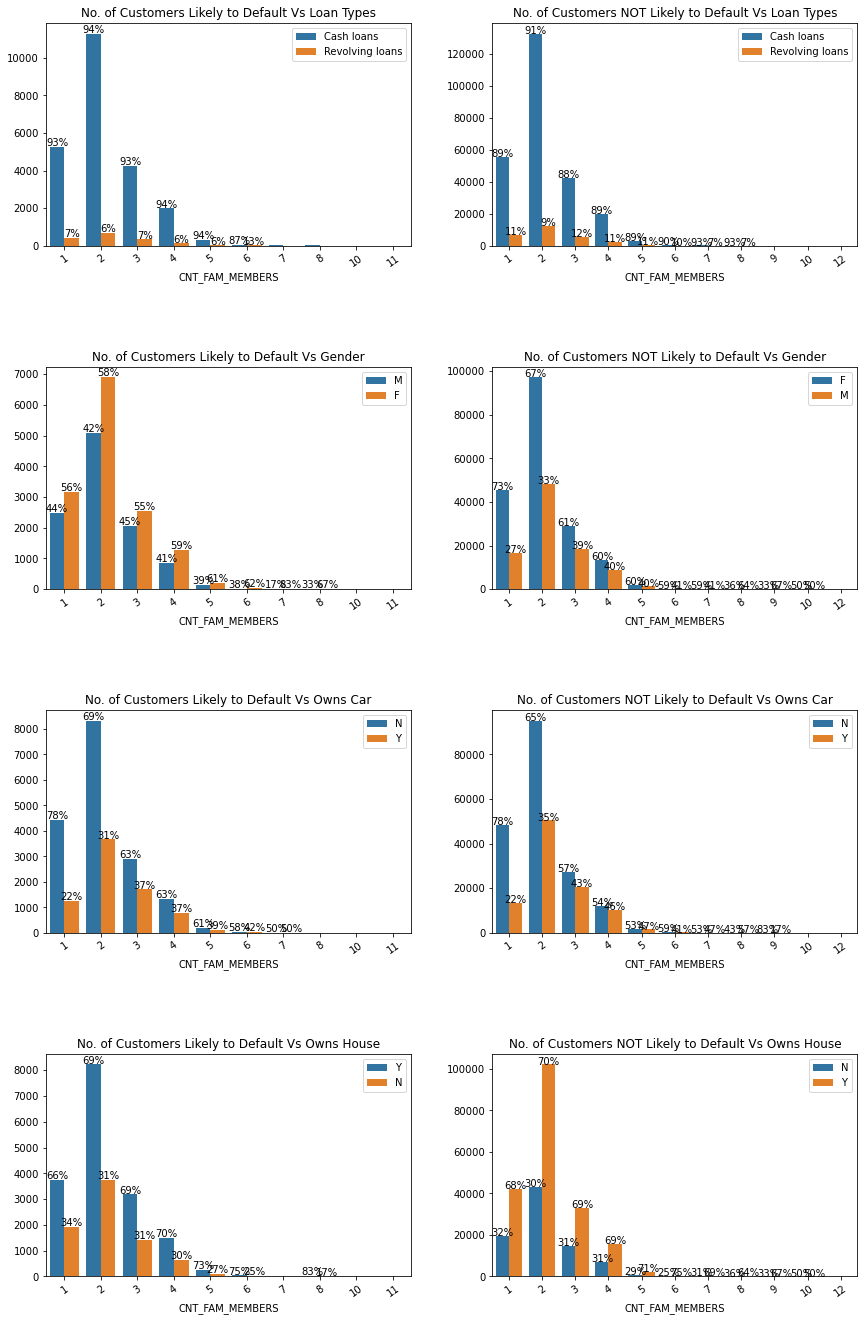

In [107]:
plot_target_categorical_vs_categorical('CNT_FAM_MEMBERS')

### Inferences drawn from the plots for Family Member's Count in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are MORE likely to default than those who are having Revolving Loans.
- Compared with 'Gender', similar pattern is observed however, in general Females are slightly LESS likely to default.
- Compared whether 'Owns Car', those where family count is more than 2 are slightly MORE likely to default.(In general)
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of Children Count in different categories like Loan Types, Gender, Owns Car, Owns House for Target Variable

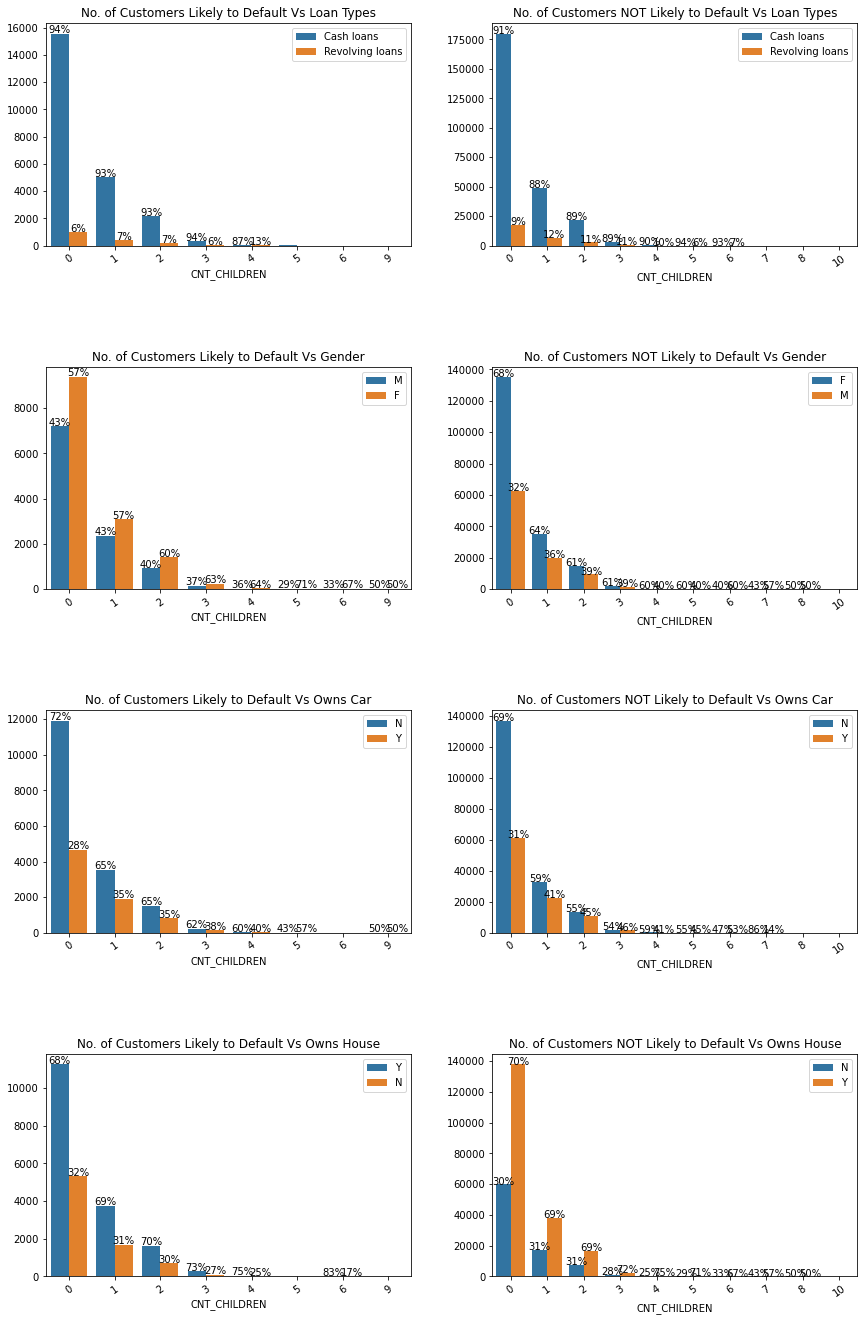

In [108]:
plot_target_categorical_vs_categorical('CNT_CHILDREN')

### Inferences drawn from the plots for Children's Count in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are MORE likely to default than those who are having Revolving Loans.
- Compared with 'Gender', similar pattern is observed however, in general Females are slightly LESS likely to default.
- Compared whether 'Owns Car', those who don't own car are slightly MORE likely to default.
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

<Figure size 1440x1440 with 0 Axes>

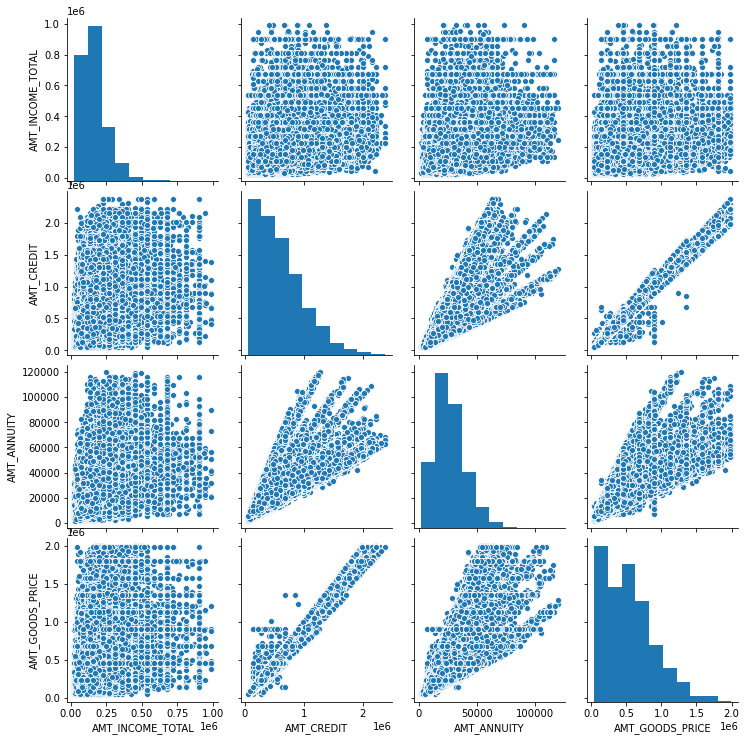

In [109]:
# Create a pair plot for Spread of Income, Credit, Annuity, Good's Price
plt.figure(figsize=[20,20])
sns.pairplot(application_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.xlabel('')
plt.ylabel('')
plt.show()

### Inferences from the Pairplot for the Amounts:
- In general there is no as such relation observed for the Income Vs Annuity and Credit and Goods amount, the data is distributed uniformly across all the values.
- However, we can observe a relation of Credit amount with Goods and Annuity amount.
- There is as strong linear relation between Credit amount and Goods Price, there is a strong pattern or slightly less linear pattern is observed between goods amount and annuity amount.

<Figure size 576x576 with 0 Axes>

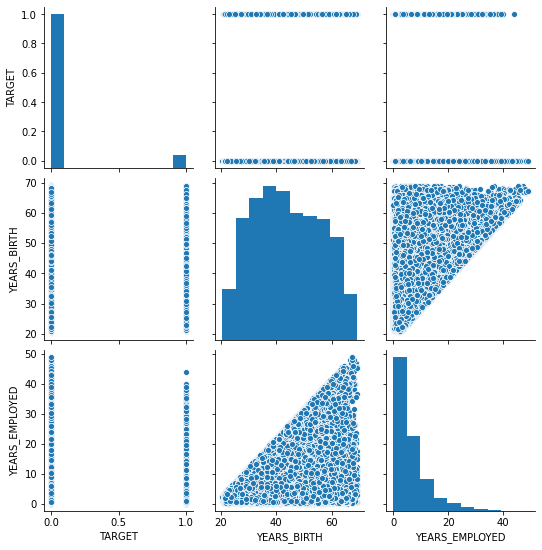

In [110]:
# Create a pair plot for Spread of Targe, Years_Birth, Years_Employed
plt.figure(figsize=[8,8])
sns.pairplot(application_data[['TARGET','YEARS_BIRTH','YEARS_EMPLOYED']])
plt.show()

### Inferences drawn from Pairplot for Years:
- We can hardly infer anythinh from Birth Years, Employed Years as compared to Target Variable.
- There is a strong pattern between Birth Years and Employed Years, Birth Years are always more than that of Employed Years.

- In this, we will analyze different combination of factors that may affect the Target Variable.
- We will generate insights for multiple columns with the target column and check if any insights are there.

In [111]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

## Analysis of Categorical Vs Categorical w.r.t Target Target

In [112]:
def plot_heat_maps(index, column, ax, title):
    pivot_table = pd.pivot_table(data=application_data,index=index,columns=column,values='TARGET')
    sns.heatmap(pivot_table,cmap="RdYlGn_r",vmin=0,vmax=1,annot=True,annot_kws={"size": 15},ax=ax)
    ax.set_title(title,fontsize=15)


### Analysis of Income Vs Education and Income Vs Family Status w.r.t. Target

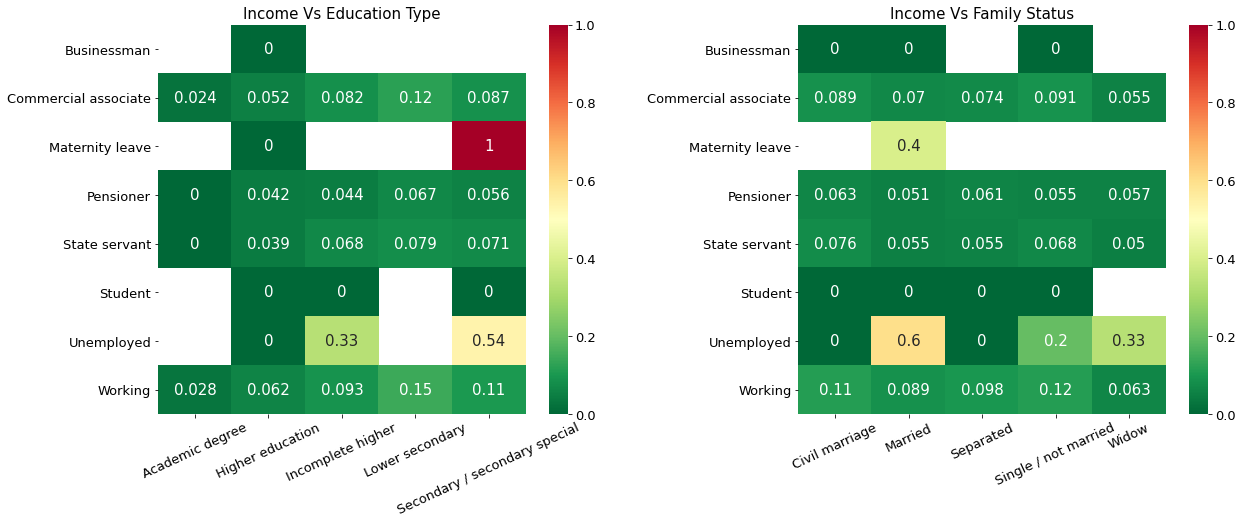

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=15)

plot_heat_maps('NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', ax[0], 'Income Vs Education Type')
plot_heat_maps('NAME_INCOME_TYPE','NAME_FAMILY_STATUS',ax[1], 'Income Vs Family Status')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences from the above Heatmap for Income Vs Education and Family wrt Target
- Those who have income type as` Maternity Leave` and have education `Secondary/Secondary Special` `are highly likely to default`. This may be due to facing payment difficulties while on Maternity Leave.
- Those who are `Unemployed` and have `Secondary/ Secondary Special education type` are also `slightly less likely to default` as they have somewhat higher percentage.
- Those who are `Married` and `Unemployed` are slightly likely to default.
- There are many categories in both the heatmaps where the percentage is almost 0, that means they are not `likely to default at all` e.g. `Higher Educated Businessman`, `Separated Unemployed`, etc.

### Analysis of Income type and Family Type with Housing Type w.r.t. Target Variable using Heatmaps

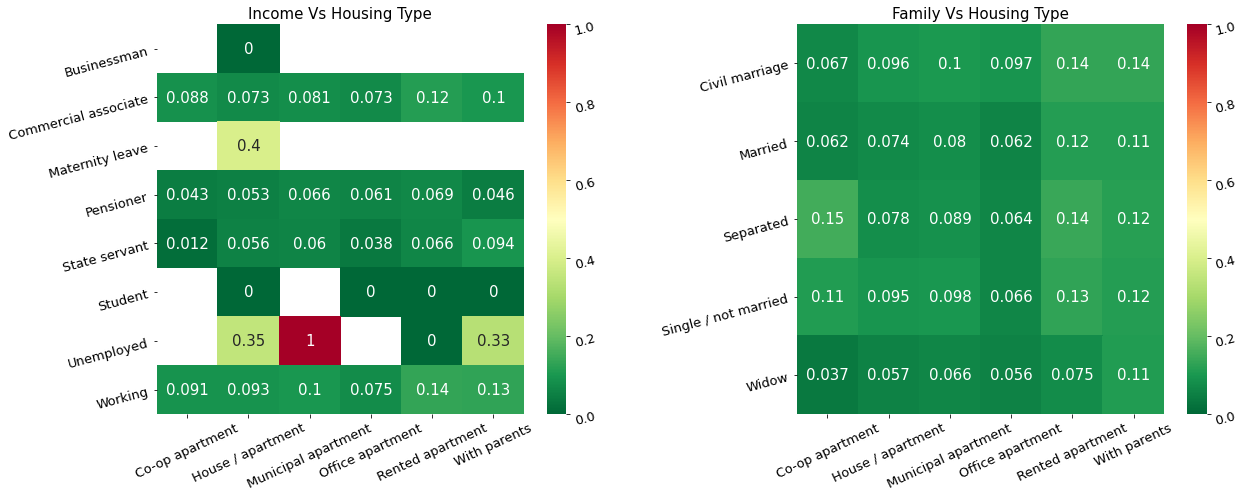

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

fig.tight_layout(h_pad=11,w_pad=15)

plot_heat_maps('NAME_INCOME_TYPE','NAME_HOUSING_TYPE', ax[0], 'Income Vs Housing Type')
plot_heat_maps('NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', ax[1], 'Family Vs Housing Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=15)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences from the heatmap for Housing Type Vs Income Type and Family Status wrt Target Variable
- Those who leave in `Municipal Apartment and are unemployed` are `highly likely to default`.
- Those who leave in `House/ Apartment and on Maternity Leave` are `slightly likely to default`
- Every family type is equally likely to pay the loans for every housing type, as the percentages are almost equal and tending o 0.
- Students living in any apartment, rented and unemployed and businessman living in House Apartment are not likely to default at all.

### Analysis of Income type and Family Type with Housing Type w.r.t. Target Variable using Heatmaps

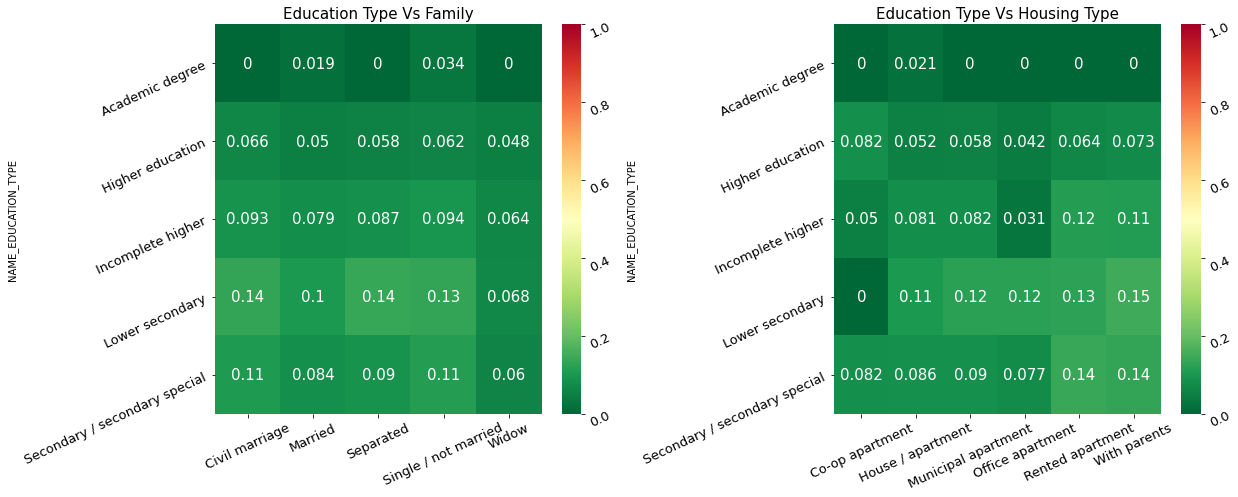

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=15,w_pad=18)

plot_heat_maps('NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', ax[0], 'Education Type Vs Family')
plot_heat_maps('NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',ax[1], 'Education Type Vs Housing Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=25)
    plt.xlabel('')
    plt.xlabel('')
plt.show()

### Inferences from the heatmap for Education Types Vs Housing Type and Family Status wrt Target Variable
- From these heatmaps, we can infer that everyone is able to pay the loan and is less likely to default.
- We can strongly say that there are those with Academic Degree are not likely to default.
- Those who live in Co-op apartment and have lower secondary education type are also not likely to default.

### Analysis of Children Count vs Family Members Count w.r.t. Target Variable using Heatmaps

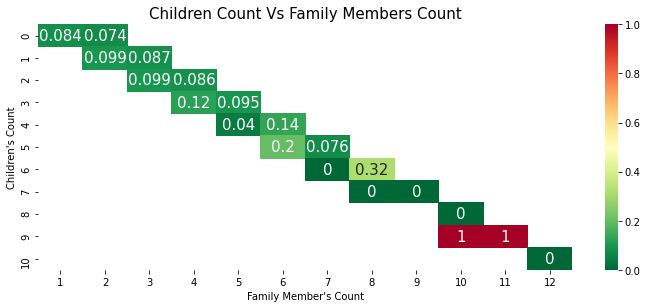

In [116]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=15,w_pad=18)

plot_heat_maps('CNT_CHILDREN','CNT_FAM_MEMBERS', ax, 'Children Count Vs Family Members Count')
plt.xlabel('Family Member\'s Count') 
plt.ylabel('Children\'s Count')
plt.show()

### Inferences from the heatmap for Children Count Vs Family Members wrt Target Variable
- From this heatmap, we can infer that those who have `children count 9 and family member count as 10  or 11` are `highly likely to default`.
- Those who have children count as 6 and family count 8 are slightly likely to default as compared to others.
- Those who have children count till 4 and family member count till 5 are likely to pay the loan, also surprisingly there are some families with more than 8 members are highly likely to pay the loan, may be some exceptional cases, or the data present is less for such families. 

In [117]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

### Analysis of Contract Types, Gender, Owns Car, Owns house  w.r.t. Target Variable using Heatmaps

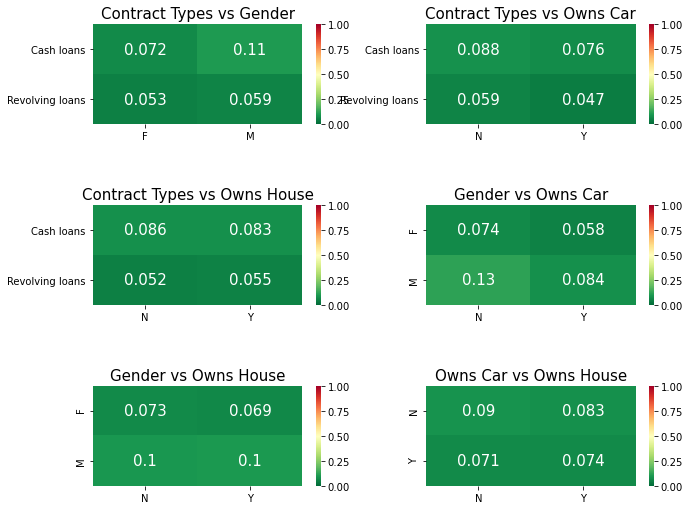

In [118]:
fig, ax = plt.subplots(3,2, figsize=(9,7))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=6,w_pad=4)

plot_heat_maps('NAME_CONTRACT_TYPE','CODE_GENDER', ax[0][0], 'Contract Types vs Gender')
plot_heat_maps('NAME_CONTRACT_TYPE','FLAG_OWN_CAR', ax[0][1], 'Contract Types vs Owns Car')
plot_heat_maps('NAME_CONTRACT_TYPE','FLAG_OWN_REALTY', ax[1][0], 'Contract Types vs Owns House')
plot_heat_maps('CODE_GENDER','FLAG_OWN_CAR', ax[1][1], 'Gender vs Owns Car')
plot_heat_maps('CODE_GENDER','FLAG_OWN_REALTY', ax[2][0], 'Gender vs Owns House')
plot_heat_maps('FLAG_OWN_CAR','FLAG_OWN_REALTY', ax[2][1], 'Owns Car vs Owns House')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences from above heatmap:
- From these heatmaps, we can infer that everyone is able to pay the loan and is less likely to default.
- There is no strong relation or evidence from which we can say that someone is NOT likely to pay the loan or likely to default.

## Analysis for Continuous Vs Categorical Columns w.r.t. Target Variables

In [119]:
def plot_bar_plots_amount(x_axis):
    
    fig, ax = plt.subplots(4,2,figsize=(15,15))
    
    fig.tight_layout(h_pad=11,w_pad=5)

    sns.violinplot(x = x_axis, y = 'AMT_INCOME_TOTAL', data = application_data, hue ='TARGET', split = True, ax=ax[0][0])
    sns.violinplot(x = x_axis, y = 'AMT_CREDIT', data = application_data, hue ='TARGET', split = True, ax=ax[0][1])
    sns.violinplot(x = x_axis, y = 'AMT_ANNUITY', data = application_data, hue ='TARGET', ax=ax[1][0])
    sns.violinplot(x = x_axis, y = 'AMT_GOODS_PRICE', data = application_data, hue ='TARGET', ax=ax[1][1])
    
    
    sns.barplot(x = x_axis, y = 'AMT_INCOME_TOTAL', data = application_data, hue ='TARGET', ax=ax[2][0])
    sns.barplot(x = x_axis, y = 'AMT_CREDIT', data = application_data, hue ='TARGET', ax=ax[2][1])
    sns.barplot(x = x_axis, y = 'AMT_ANNUITY', data = application_data, hue ='TARGET', ax=ax[3][0])
    sns.barplot(x = x_axis, y = 'AMT_GOODS_PRICE', data = application_data, hue ='TARGET', ax=ax[3][1])
    
    ax[0][0].set_title("Violin Distribution for "+ x_axis + " vs AMT_INCOME_TOTAL"  + " wrt Target Column",fontsize=10)
    ax[0][1].set_title("Violin Distribution for "+ x_axis + " vs AMT_CREDIT" + " wrt Target Column",fontsize=10)
    ax[1][0].set_title("Violin Distribution for "+ x_axis + " vs AMT_ANNUITY" + " wrt Target Column",fontsize=10)
    ax[1][1].set_title("Violin Distribution for "+ x_axis + " vs AMT_GOODS_PRICE" + " wrt Target Column",fontsize=10)
    
    ax[2][0].set_title("Bar Plot for "+ x_axis + " vs AMT_INCOME_TOTAL"  + " wrt Target Column",fontsize=10)
    ax[2][1].set_title("Bar Plot for "+ x_axis + " vs AMT_CREDIT" + " wrt Target Column",fontsize=10)
    ax[3][0].set_title("Bar Plot for "+ x_axis + " vs AMT_ANNUITY" + " wrt Target Column",fontsize=10)
    ax[3][1].set_title("Bar Plot for "+ x_axis + " vs AMT_GOODS_PRICE" + " wrt Target Column",fontsize=10)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=25)
        plt.legend(loc='upper right')
        plt.xlabel('')
        plt.ylabel('')

### Analysis for Education Types Vs Income, Credit, Annuity and Goods Price Columns w.r.t Target Variables

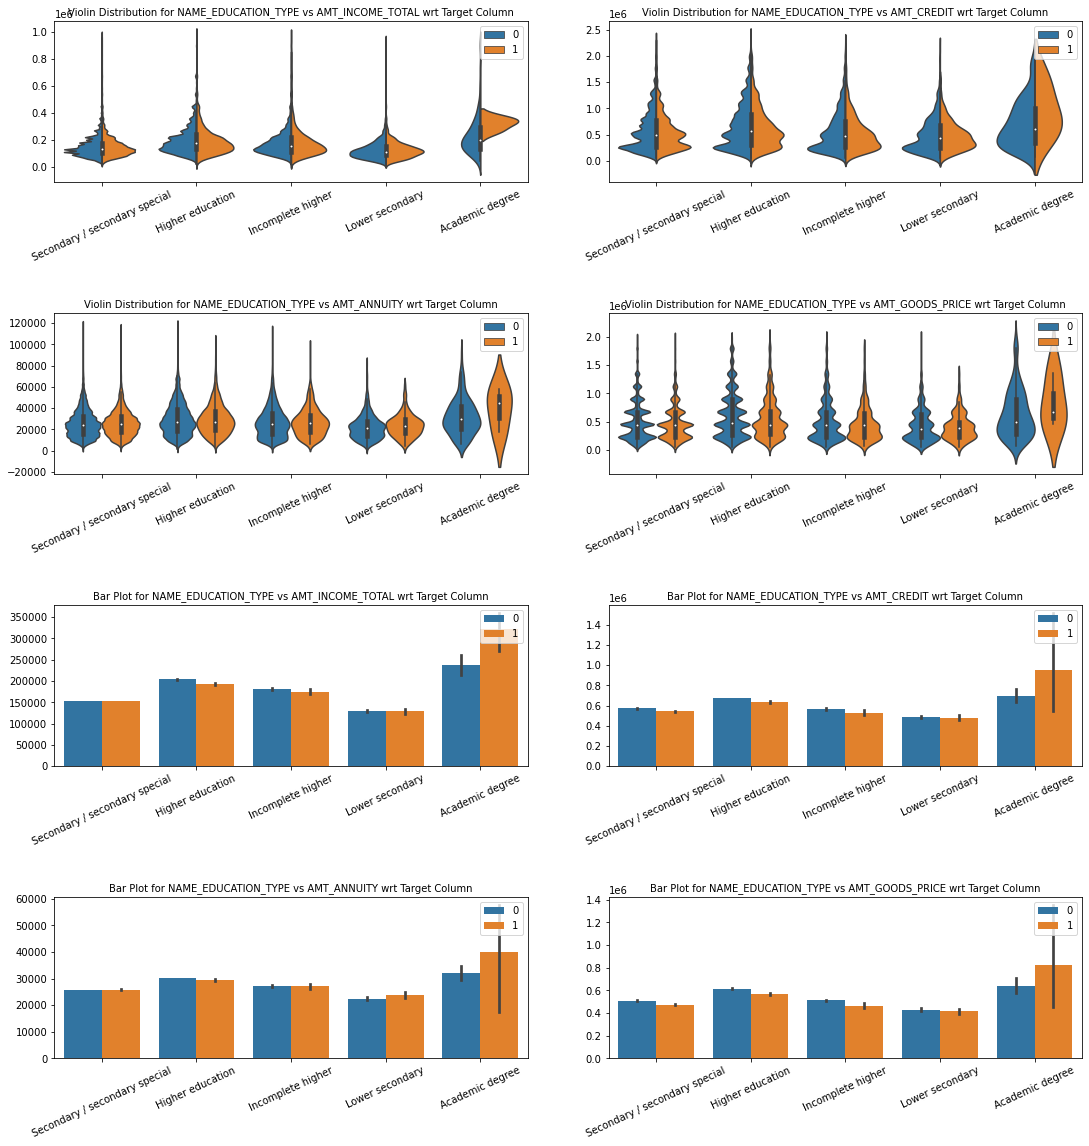

In [120]:
plot_bar_plots_amount('NAME_EDUCATION_TYPE')
plt.show()

### Inferences from above Charts:
- We are not able to derive any strong indications or difference between the distributions based on Income,Credit, Annuity and Goods' Price because the distribution is almost similar in every column.
- However, we can say that those who have `academic degree as education type are slightly more likely to default` based on the distribution in the from Violin and Bar Plot.
- The counts for the customers who are likely to default is slightly higher than the customers who are not likely to default, in all the bar charts, where are the distributions of academic degree is also different and more evenly as compared to other education categories

### Analysis for Income Types Vs Income, Credit, Annuity and Goods Price Columns w.r.t Target Variable

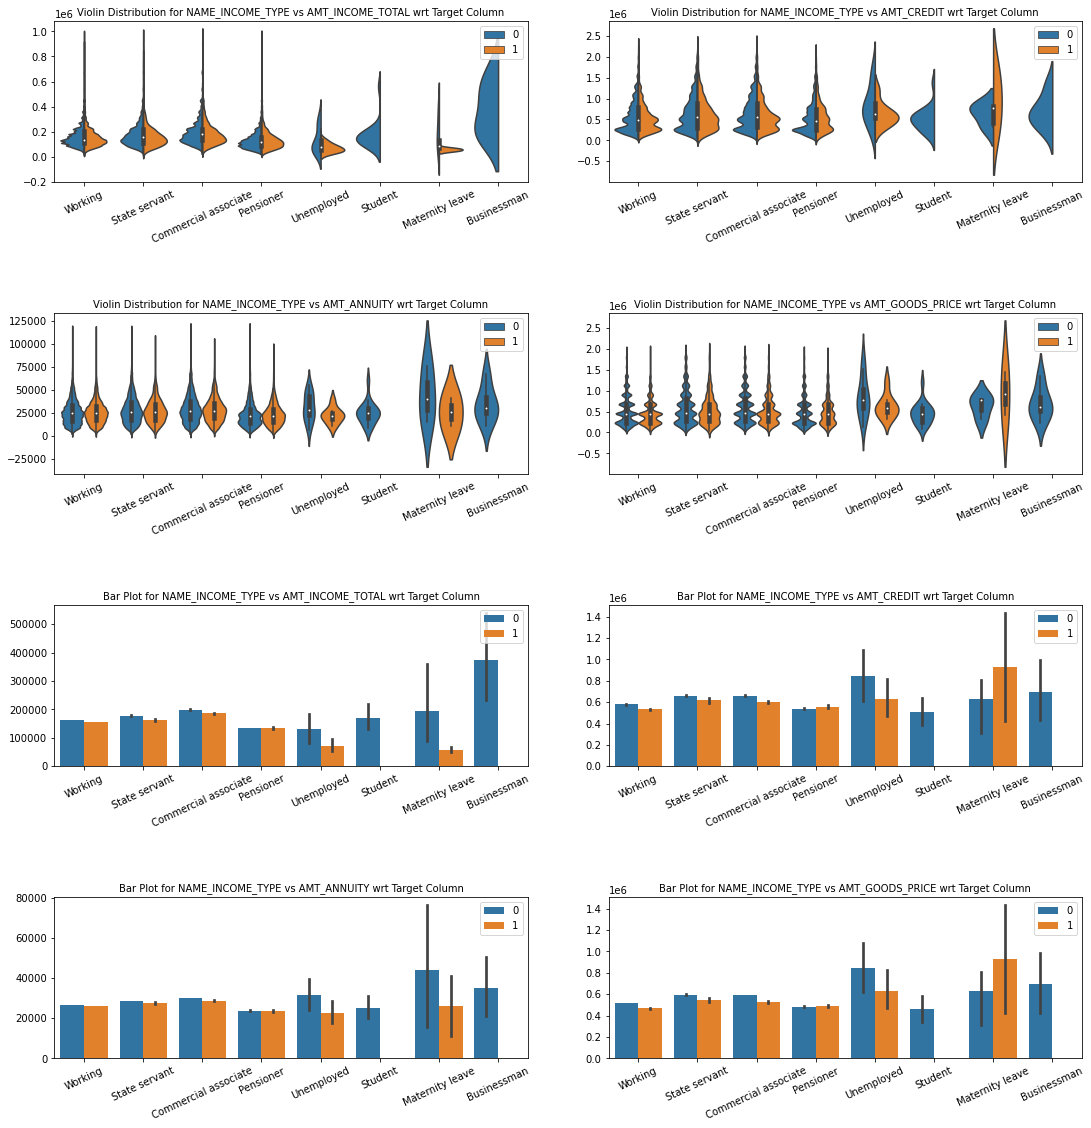

In [121]:
plot_bar_plots_amount('NAME_INCOME_TYPE')
plt.show()

### Inferences from above Distributions for Amounts of Income, Credit, Goods and Annuity wrt Target Variable
- The distribution is almost `similar in those customers who are Working, State Servant, Commercial Associate, Unemployed, Pensioner`.
- The distribution of those who are likely to pay the loan and those who are likely to default for `Student, BusinessMan, and Maternity Leave are significantly different`.
- Student and businessman are `highly likely to repay the loan` and almost no student or businessman became defaulters until now.
-  Those who are on maternity leave, have different interpretations and distributions for Income and Annuity amount as compared to Credit and Goods Price amount. After observing the violin and boxplot, we can say that those are `likely to default`.

In [122]:
def plot_bar_plots_days(x_axis):
    
    fig, ax = plt.subplots(2,2,figsize=(15,8))
    
    fig.tight_layout(h_pad=11,w_pad=5)

    sns.barplot(x = x_axis, y = 'YEARS_BIRTH', data = application_data, hue ='TARGET', ax=ax[0][0])
    sns.violinplot(x = x_axis, y ='YEARS_BIRTH', data = application_data, hue ='TARGET', split = True, ax=ax[0][1])
    sns.barplot(x = x_axis, y = 'YEARS_EMPLOYED', data = application_data, hue ='TARGET', ax=ax[1][0])
    sns.violinplot(x = x_axis, y ='YEARS_EMPLOYED', data = application_data, hue ='TARGET', split = True, ax=ax[1][1])
    
    
    ax[0][0].set_title("Bar distribution for "+ x_axis + " vs YEARS_BIRTH"  + " w.r.t Target Column", fontsize=10)
    ax[0][1].set_title("Violin dsitribution for "+ x_axis + " vs YEARS_BIRTH" + " w.r.t Target Column", fontsize=10)
    ax[1][0].set_title("Bar distribution for "+ x_axis + " vs YEARS_EMPLOYED" + " w.r.t Target Column", fontsize=10)
    ax[1][1].set_title("Violin distribution for "+ x_axis + " vs YEARS_EMPLOYED" + " w.r.t Target Column", fontsize=10)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=25)
        plt.legend(loc='upper right')
        plt.xlabel('')
        plt.ylabel('')

### Analysis for Income Types Vs Birth years and Employement Years w.r.t Target Columns

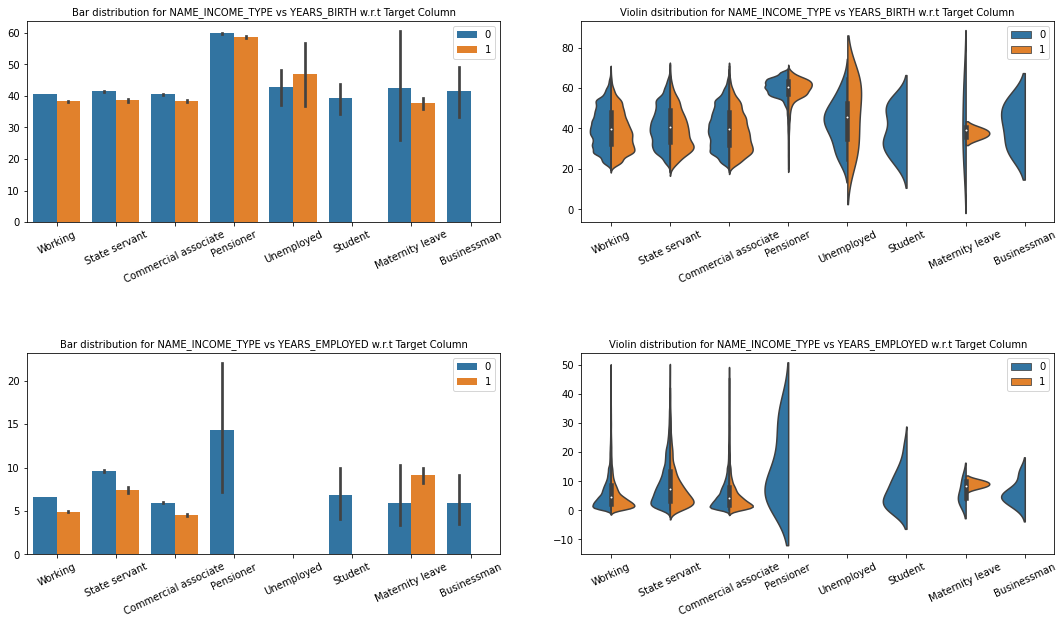

In [123]:
plot_bar_plots_days('NAME_INCOME_TYPE')
plt.show()

### Inferences from above Distributions for Birth and Employment Years vs Income Type wrt Target Variable
- The distribution is almost `similar in those customers who are Working, State Servant, Commercial Associate, Unemployed`.
- The distribution of those who are likely to pay the loan and those who are likely to default for `Student, BusinessMan, Pensioner and Maternity Leave are significantly different`.
- Pensioner, Student and businessman are `highly likely to repay the loan` and almost no student,pensioner or businessman became defaulters until now(Based on Years Employed).
-  Those who are on maternity leave, have different interpretations and distributions for Income and Annuity amount as compared to Credit and Goods Price amount. After observing the violin and boxplot, we can say that those are `likely to default`.

### Analysis for Education Types Vs Birth years and Employment Years w.r.t Target Columns

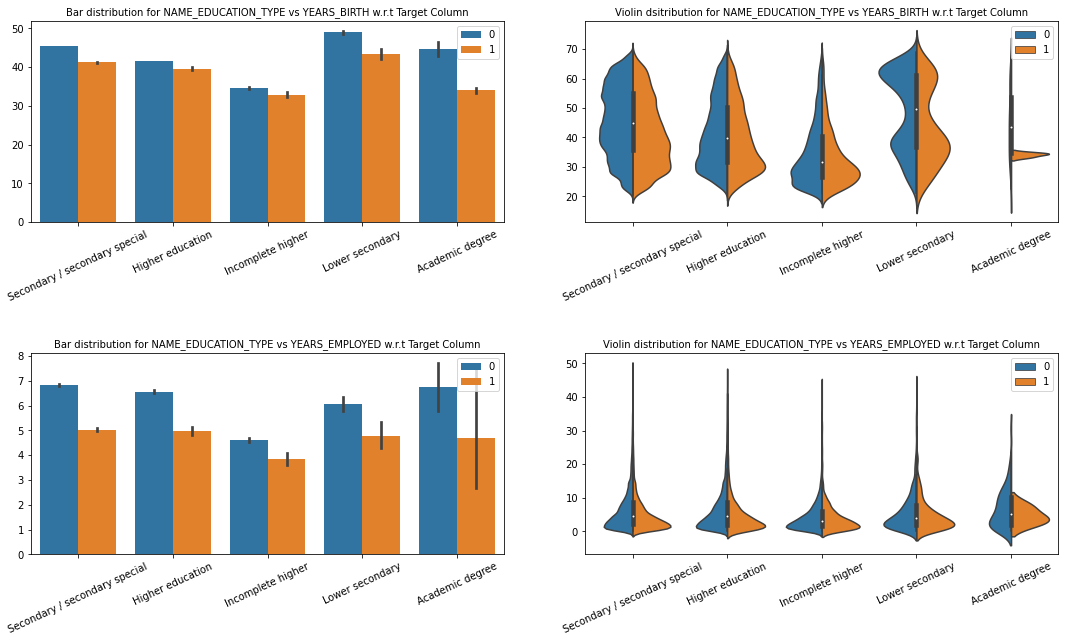

In [124]:
plot_bar_plots_days('NAME_EDUCATION_TYPE')
plt.show()

### Inferences from above Charts:
- We are not able to derive any strong indications or difference between the distributions for Birth Years and Employment Years because the distribution is almost similar in every column.
- However, we can say that those who are 30 to 40 years old or those who are employed since 0 to 10 years and have `academic degree as education type are slightly more likely to default` based on the distribution in the from Violin Plot.

# Multivariate analysis for Continuous Vs Continuous Columns

In [125]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

In [126]:
application_data.AMT_ANNUITY.max()/5

23924.7

In [127]:
# Let's bucket the total income of customers into 5 groups viz. '<2.20L','2.20L to 4.1L','4.1L to 6L','6L to 8L','>8L'

application_data['AMT_INCOME_RANGE'] = pd.cut(application_data.AMT_INCOME_TOTAL,bins=5,labels=['Below Avg','Mean','Above Avg','Good',
                                         'Better'])


# Let's bucket the credit amount of customers into 5 groups viz. '<5.11L','5.11L to 9.77L','9.77L to 14.4L','14.4L to 19L','>19L'

application_data['AMT_CREDIT_RANGE'] = pd.cut(application_data.AMT_CREDIT,bins=5,labels=['Below Avg','Mean','Above Avg','Good',
                                         'Better'])


# Let's bucket the annuity amount of customers into 5 groups viz. '<25K','25K to 48K','48K to 72K','72K to 96K','>96K'

application_data['AMT_ANNUITY_RANGE'] = pd.cut(application_data.AMT_ANNUITY,bins=5,labels=['Below Avg','Mean','Above Avg','Good',
                                         'Better'])


# Let's bucket the annuity amount of customers into 5 groups viz. '<4.32L','4.32L to 8.23L','8.23L to 121.5L','121.5L to 160L','>160L'

application_data['AMT_GOODS_RANGE'] = pd.cut(application_data.AMT_GOODS_PRICE,bins=5,labels=['Below Avg','Mean','Above Avg','Good',
                                         'Better'])


# Let's bucket the years birth of customers into 5 groups viz. 'Below Avg','Mean','Above Avg','Good', 'Better'

application_data['YEARS_BIRTH_RANGE'] = pd.cut(application_data.YEARS_BIRTH,bins=5,labels=['Below Avg','Mean','Above Avg','Good',
                                         'Better'])

# Let's bucket the years employed of customers into 5 groups viz. 'Below Avg','Mean','Above Avg','Good', 'Better'

application_data['YEARS_EMPLOYED_RANGE'] = pd.cut(application_data.YEARS_EMPLOYED,bins=5,labels=['Below Avg','Mean','Above Avg','Good',
                                         'Better'])

# Let's put the Flag values as 1's or 0's instead of Y or N for the calculational purpose

application_data.FLAG_OWN_CAR = application_data.FLAG_OWN_CAR.apply(lambda flag: 1 if flag=='Y' else 0)
application_data.FLAG_OWN_REALTY = application_data.FLAG_OWN_REALTY.apply(lambda flag: 1 if flag=='Y' else 0)

# Removing the numerical amount columns which are not required after binning.
drop_numeric = ['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED']
application_data.drop(drop_numeric,inplace=True,axis=1)

### Analysis for Income Range Vs Income Type and Family Status w.r.t Target Columns

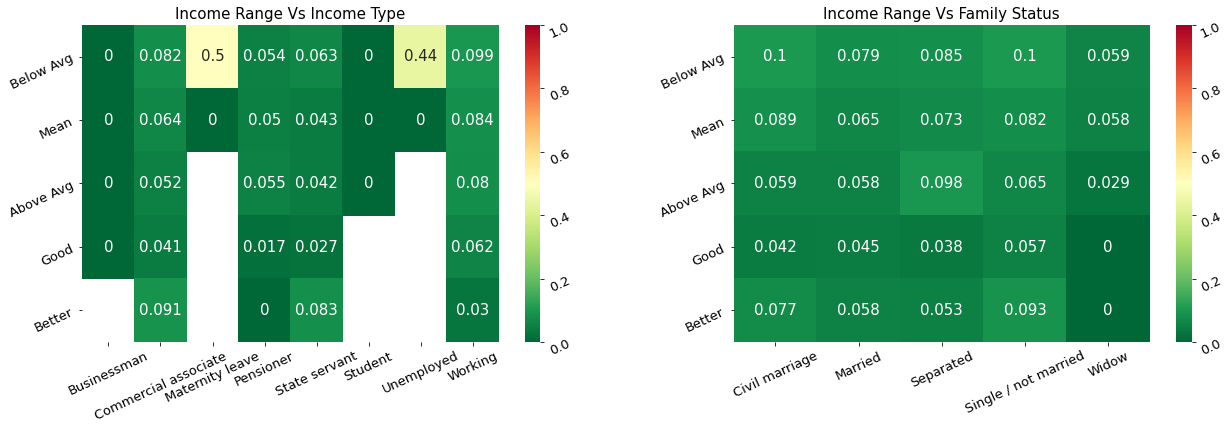

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(17,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=10)

plot_heat_maps('AMT_INCOME_RANGE','NAME_INCOME_TYPE', ax[0], 'Income Range Vs Income Type')
plot_heat_maps('AMT_INCOME_RANGE','NAME_FAMILY_STATUS',ax[1], 'Income Range Vs Family Status')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=25)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

### Inferences from the above Heatmap for Income Range Vs Income Type and Family Status wrt Target
- Those who are on `maternity leave and have below average income` are facing more difficulties and can be `more likely to default.`
-  Also, those who are `Unemployed and have Below Average` income, we can infer that they are `also likely to default`.
- There are some strong indicator for various income types and family statuses, where the customers are `not likely to default`. like `All types of Businessman`, `Widows with Good and Better Income Range` 

In [129]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE  \
0                1             0          Working   
1                0             0    State servant   
2                1             0          Working   
3                1             0          Working   
4                1             0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE AMT_INCOME_RANGE AMT_CREDIT_RANGE  \
0                1   Business Entity        Below Avg        Below Avg   
1                2            School             Mean        Above Avg   
2                1        Government        Below Avg        Below Avg   
3                2   Business Entity        Below Avg        Below Avg   
4                1          Religion        Below Avg             Mean   

  AMT_ANNUITY_RANGE AMT_GOODS_RANGE YEARS_BIRTH_RANGE YEARS_EMPLOYED_RANGE  
0         Below Avg       Below Avg         Below Avg            Below Avg  
1              Mean       Above Avg         Above Avg            Below Avg  
2         Below Avg       Below Avg              Good            Below Avg  
3              Mean       Below Avg              Good            Below Avg  
4         Below Avg            Mean              Good            Below Avg

# Analysis for Previous Applications Data using previous_application_data.csv

In [130]:
# Loading the required datasets

# Loading the dataset related to Previous Loan Applications

master_previous_application = pd.read_csv("previous_application.csv")

In [131]:
# Displaying the loaded dataset's head for quick glance

master_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [132]:
# View the shape of the dataset

master_previous_application.shape

(1670214, 37)

In [133]:
# Let's understand the data types of all the columns and counts

master_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [134]:
# Let's view the statistical information from the columns those are already numeric

master_previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [135]:
# Let's copy the Master Previous application data into another data frame, so that we can reduce the required information only for the analysis

previous_application = master_previous_application

## Data Handling and Data Cleaning
- We will analyze the columns that are required for the analysis, according to the business objective
- We will handle and manage the missing or null values that are present in some of the columns.
- We will correct the data types of certain columns.

#### Extracting required columns
- Let's view the columns and their importance for the analysis.
- We will keep only those columns that are required to achieve the business objective.
- We will ignore all the other extra informations that are present in the dataframe and are not required.

In [136]:
# Ignoring other columns that may not affect our analysis just by their meaning.

del_columns = [
#     'SK_ID_PREV',
#     'SK_ID_CURR',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'NAME_PAYMENT_TYPE',
    'NAME_TYPE_SUITE',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'SELLERPLACE_AREA',
    'NAME_SELLER_INDUSTRY',
    'PRODUCT_COMBINATION'
]

In [137]:
# Dropping the above mentioned columns from the list

previous_application.drop(del_columns,axis = 1,inplace=True)

In [138]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0     17145.0               0.0          17145.0                           Y   
1    679671.0               NaN         607500.0                           Y   
2    136444.5               NaN         112500.0                           Y   
3    470790.0               NaN         450000.0                           Y   
4    404055.0               NaN         337500.0                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0            -73                XAP         Repeater              Mobile   
1           -164                XAP         Repeater                 XNA   
2           -301                XAP         Repeater                 XNA   
3           -512                XAP         Repeater                 XNA   
4           -781                 HC         Repeater                 XNA   

   CNT_PAYMENT NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0         12.0           middle            365243.0           -42.0   
1         36.0       low_action            365243.0          -134.0   
2         12.0             high            365243.0          -271.0   
3         12.0           middle            365243.0          -482.0   
4         24.0             high                 NaN             NaN   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0          -42.0             -37.0   
1                      916.0       365243.0          365243.0   
2                       59.0       365243.0          365243.0   
3                     -152.0         -182.0            -177.0   
4                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN

In [139]:
previous_application.shape

(1670214, 27)

In [140]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 10  RATE_DOWN_PAYMENT            774370 non-null   float64
 11  RATE_INTEREST_PRIMARY        5951 non-null     float64
 12  RATE_INTEREST_PRIVILEGED     5951 non-null

## Univariate Analysis
- Analysis to check the null value counts, missing values, incorrect column type
- Distribution of values throughout the columns

In [141]:
# Let's check the null count percentage

previous_application.isnull().sum()/previous_application.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE   

In [142]:
# We will delete those columns whose missing value percentage is >20%

del_columns = [
    'AMT_ANNUITY',
    'AMT_DOWN_PAYMENT',
    'AMT_GOODS_PRICE',
    'RATE_DOWN_PAYMENT',
    'RATE_INTEREST_PRIMARY',
    'RATE_INTEREST_PRIVILEGED',
    'CNT_PAYMENT',
    'DAYS_FIRST_DRAWING',
    'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE',
    'DAYS_TERMINATION',
    'NFLAG_INSURED_ON_APPROVAL'
]

In [143]:
# Dropping the above mentioned columns from the list

previous_application.drop(del_columns,axis = 1,inplace=True)

In [144]:
# Displaying the head again

previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             Approved            -73                XAP         Repeater   
1             Approved           -164                XAP         Repeater   
2             Approved           -301                XAP         Repeater   
3             Approved           -512                XAP         Repeater   
4              Refused           -781                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_YIELD_GROUP  
0              Mobile           middle  
1                 XNA       low_action  
2                 XNA             high  
3                 XNA           middle  
4                 XNA             high

In [145]:
# We can see, there are many XAP,XNA values in the columns.
# Let's count the percentage of XAP/XNA values in each column

print("NAME_CASH_LOAN_PURPOSE: " + str(previous_application[(previous_application.NAME_CASH_LOAN_PURPOSE=='XAP') | (previous_application.NAME_CASH_LOAN_PURPOSE == 'XNA')].shape[0]/previous_application.shape[0]*100))
print("CODE_REJECT_REASON: " + str(previous_application[(previous_application.CODE_REJECT_REASON=='XAP') | (previous_application.CODE_REJECT_REASON == 'XNA')].shape[0]/previous_application.shape[0]*100))
print("NAME_GOODS_CATEGORY: " + str(previous_application[(previous_application.NAME_GOODS_CATEGORY=='XAP') | (previous_application.NAME_GOODS_CATEGORY == 'XNA')].shape[0]/previous_application.shape[0]*100))

NAME_CASH_LOAN_PURPOSE: 95.83077378108435
CODE_REJECT_REASON: 81.32712335066046
NAME_GOODS_CATEGORY: 56.92737577340389


In [146]:
# We can observe the precentage of such values is huge
# So we can directly remove those columns.

del_columns = [
    'NAME_CASH_LOAN_PURPOSE',
    'CODE_REJECT_REASON',
    'NAME_GOODS_CATEGORY'
]

# Dropping the above mentioned columns from the list

previous_application.drop(del_columns,axis = 1,inplace=True)

In [147]:
# Displaying the result head

previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION NAME_CLIENT_TYPE NAME_YIELD_GROUP  
0            -73         Repeater           middle  
1           -164         Repeater       low_action  
2           -301         Repeater             high  
3           -512         Repeater           middle  
4           -781         Repeater             high

In [148]:
# Checking the null purcentage
previous_application.isnull().sum()/previous_application.shape[0]*100

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_CLIENT_TYPE               0.00000
NAME_YIELD_GROUP               0.00000
dtype: float64

In [149]:
# Displaying the shape of the data

previous_application.shape

(1670214, 11)

In [150]:
# There are very less percentage of null values in AMT_CREDIT column, let's remove those values from the data
previous_application = previous_application[~previous_application.AMT_CREDIT.isnull()]

# Checking the null purcentage
previous_application.isnull().sum()/previous_application.shape[0]*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_CLIENT_TYPE               0.0
NAME_YIELD_GROUP               0.0
dtype: float64

In [151]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_APPLICATION                float64
AMT_CREDIT                     float64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_CLIENT_TYPE                object
NAME_YIELD_GROUP                object
dtype: object

In [152]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION NAME_CLIENT_TYPE NAME_YIELD_GROUP  
0            -73         Repeater           middle  
1           -164         Repeater       low_action  
2           -301         Repeater             high  
3           -512         Repeater           middle  
4           -781         Repeater             high

## Univariate Analysis for Distribution
- We will analyze how the data is spread throughout the column
- For categorical columns, we will count the number of each category and then visualize it in bar/pie chart.
- For numerical columns, we will analyze the spread of numbers and remove the outliers from the data.

In [153]:
# Let's view the applications that are not the last application per contract
# We can remove such applications from the data as they are not required at all and duplicate entry may be present in the data

previous_application[previous_application.FLAG_LAST_APPL_PER_CONTRACT == 'N'].shape[0]

8475

In [154]:
# Removing the values from data where the application is not the last application of the day

previous_application = previous_application[~(previous_application.FLAG_LAST_APPL_PER_CONTRACT == 'N')]

# Removing the column as it is not even required for further analysis.

previous_application.drop(['FLAG_LAST_APPL_PER_CONTRACT'],inplace=True, axis=1)

In [155]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                       1             Approved            -73   
1                       1             Approved           -164   
2                       1             Approved           -301   
3                       1             Approved           -512   
4                       1              Refused           -781   

  NAME_CLIENT_TYPE NAME_YIELD_GROUP  
0         Repeater           middle  
1         Repeater       low_action  
2         Repeater             high  
3         Repeater           middle  
4         Repeater             high

In [156]:
# Similarly we can check for the NFLAG_LAST_APPL_IN_DAY

previous_application[previous_application.NFLAG_LAST_APPL_IN_DAY == 0].shape[0]

786

In [157]:
# We can remove those rows as they are not required or there might be many duplicates in the 
# Removing the values from data where the application is not the last application of the day

previous_application = previous_application[~(previous_application.NFLAG_LAST_APPL_IN_DAY == 0)]

# Removing the column as it is not even required for further analysis.

previous_application.drop(['NFLAG_LAST_APPL_IN_DAY'],inplace=True, axis=1)

In [158]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE NAME_YIELD_GROUP  
0             Approved            -73         Repeater           middle  
1             Approved           -164         Repeater       low_action  
2             Approved           -301         Repeater             high  
3             Approved           -512         Repeater           middle  
4              Refused           -781         Repeater             high

In [159]:
previous_application.shape

(1660952, 9)

In [160]:
# Let' consider the NAME_CONTRACT_TYPE column.
# Let' view the count for each cateogry in NAME_CONTRACT_TYPE

previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747147
Consumer loans     728870
Revolving loans    184589
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [161]:
# Remove those XNA values as they can hamper our analysis

previous_application = previous_application[~(previous_application.NAME_CONTRACT_TYPE == 'XNA')]

In [162]:
# Let's view the count for each category in the NAME_CONTRACT_STATUS

previous_application.NAME_CONTRACT_STATUS.value_counts()

Approved        1036043
Canceled         316002
Refused          282138
Unused offer      26423
Name: NAME_CONTRACT_STATUS, dtype: int64

In [163]:
# Let's view the count for each category in the NAME_YIELD_GROUP

previous_application.NAME_YIELD_GROUP.value_counts()

XNA           508281
middle        385170
high          353195
low_normal    321961
low_action     91999
Name: NAME_YIELD_GROUP, dtype: int64

In [164]:
# Let' drop NAME_YIELD_GROUP as there are many XNA values present in the data which may hamper our analysis

previous_application.drop(['NAME_YIELD_GROUP'],inplace=True,axis=1)

In [165]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE  
0             Approved            -73         Repeater  
1             Approved           -164         Repeater  
2             Approved           -301         Repeater  
3             Approved           -512         Repeater  
4              Refused           -781         Repeater

In [166]:
# Let's view the count for each category in the NAME_CLIENT_TYPE

previous_application.NAME_CLIENT_TYPE.value_counts()

Repeater     1222633
New           301178
Refreshed     134858
XNA             1937
Name: NAME_CLIENT_TYPE, dtype: int64

In [167]:
# Remove those XNA values as they can hamper our analysis

previous_application = previous_application[~(previous_application.NAME_CLIENT_TYPE == 'XNA')]

In [168]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE  
0             Approved            -73         Repeater  
1             Approved           -164         Repeater  
2             Approved           -301         Repeater  
3             Approved           -512         Repeater  
4              Refused           -781         Repeater

## Analysis for Distributions of Contract Types

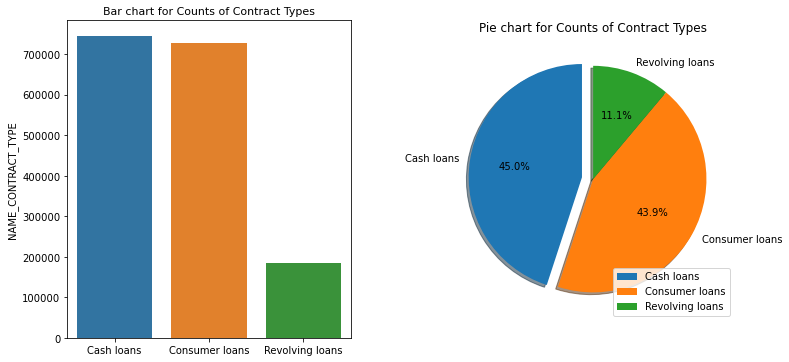

In [169]:
# Let's plot a bar plot for the counts against category in NAME_CONTRACT_TYPE
fig, ax = plt.subplots(1,2,figsize=(10,5))

fig.tight_layout(h_pad=2,w_pad=7)

contract_status = previous_application.NAME_CONTRACT_TYPE.value_counts()
sns.barplot(x = contract_status.index, y=contract_status, ax=ax[0])
ax[0].set_title('Bar chart for Counts of Contract Types', fontsize=11)

explode = (0.1, 0, 0)
contract_status.plot.pie(ax=ax[1], subplots=True, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Pie chart for Counts of Contract Types')
plt.ylabel('')

# for ax in fig.axes:
#     plt.sca(ax)
plt.legend(loc='lower right')
plt.show()

### Inferences from above Distribution for Contract Types:
- We can say that 45% of the data consists of loans that are of type Cash loans, and 43.9% of the data consists of Consumer Loans.
- There are 11.1% for Revolving Loans.

## Analysis for Distribution of Contract Statuses

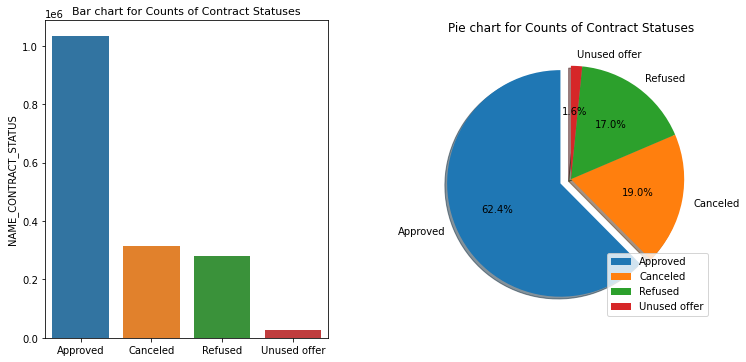

In [170]:
# Let's plot a bar plot for the counts against category in NAME_CONTRACT_STATUS
fig, ax = plt.subplots(1,2,figsize=(10,5))

fig.tight_layout(h_pad=2,w_pad=7)

contract_status = previous_application.NAME_CONTRACT_STATUS.value_counts()
sns.barplot(x = contract_status.index, y=contract_status, ax=ax[0])
ax[0].set_title('Bar chart for Counts of Contract Statuses', fontsize=11)

explode = (0.1, 0, 0, 0)
contract_status.plot.pie(ax=ax[1], subplots=True, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Pie chart for Counts of Contract Statuses')
plt.ylabel('')

# for ax in fig.axes:
#     plt.sca(ax)
plt.legend(loc='lower right')
plt.show()

### Inferences from above Distribution for Contract Statuses:
- We can say that 62.4% of the data consists of approved loans highest percentage of the loans.
- 19% and 17% of the data consists of Canceled and Refused Loans.
- There are 1.6% of the data consists of Unused Offer.

## Analysis for Distribution of Client types

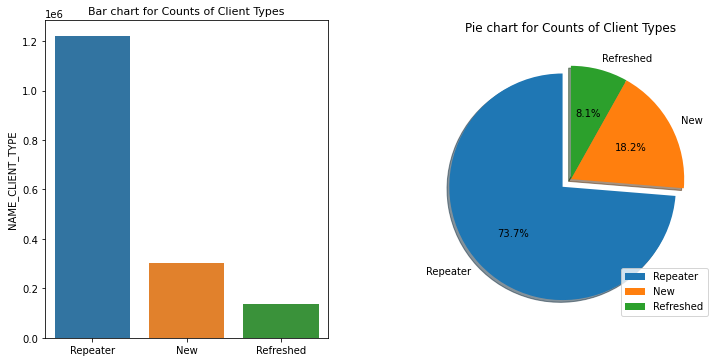

In [171]:
# Let's plot a bar plot for the counts against category in NAME_CLIENT_TYPE
fig, ax = plt.subplots(1,2,figsize=(10,5))

fig.tight_layout(h_pad=2,w_pad=7)

contract_status = previous_application.NAME_CLIENT_TYPE.value_counts()
sns.barplot(x = contract_status.index, y=contract_status, ax=ax[0])
ax[0].set_title('Bar chart for Counts of Client Types', fontsize=11)

explode = (0.1, 0, 0)
contract_status.plot.pie(ax=ax[1], subplots=True, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Pie chart for Counts of Client Types')
plt.ylabel('')

# for ax in fig.axes:
#     plt.sca(ax)
plt.legend(loc='lower right')
plt.show()

### Inferences from above Distribution for Client Types:
- We can say that 73.7% of the data consists of repeater clients, highest percentage of the client types.
- 18.2% of the types consists of New Loans.
- There are 8.1% of the data consists of Refreshed Loans.

In [172]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE  
0             Approved            -73         Repeater  
1             Approved           -164         Repeater  
2             Approved           -301         Repeater  
3             Approved           -512         Repeater  
4              Refused           -781         Repeater

# Univariate Analysis of Numerical Columns

### Let's analyze the numerical columns
- We will use box plots to analyze the outliers.
- We will then analyze imbalance in the data, deal with them, and then visualize the distributions using other graphs like Histogram, Violin Plot.

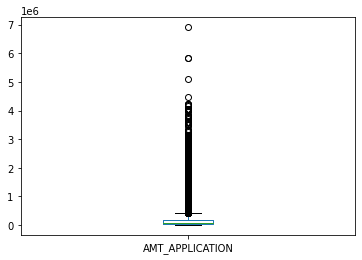

In [173]:
# Let's analyze amount of application using box plot

previous_application.AMT_APPLICATION.plot.box()
plt.show()

In [174]:
# We are seeing more data in between 0 to 1 million, let's check for the 0 or less values

previous_application[previous_application.AMT_APPLICATION <= 0]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  \
6           2315218      175704         Cash loans              0.0   
7           1656711      296299         Cash loans              0.0   
8           2367563      342292         Cash loans              0.0   
9           2579447      334349         Cash loans              0.0   
22          1172842      302212         Cash loans              0.0   
...             ...         ...                ...              ...   
1670186     1433968      272570         Cash loans              0.0   
1670187     1971628      435554         Cash loans              0.0   
1670190     2381880      175920         Cash loans              0.0   
1670192     2101747      339383    Revolving loans              0.0   
1670193     1120445      179433    Revolving loans              0.0   

         AMT_CREDIT NAME_CONTRACT_STATUS  DAYS_DECISION NAME_CLIENT_TYPE  
6               0.0             Canceled            -14         Repeater  
7               0.0             Canceled            -21         Repeater  
8               0.0             Canceled           -386         Repeater  
9               0.0             Canceled            -57         Repeater  
22              0.0              Refused           -239         Repeater  
...             ...                  ...            ...              ...  
1670186         0.0             Canceled            -21         Repeater  
1670187         0.0             Canceled           -134         Repeater  
1670190         0.0             Canceled           -243         Repeater  
1670192     67500.0             Approved           -540        Refreshed  
1670193         0.0              Refused           -365        Refreshed  

[385938 rows x 8 columns]

In [175]:
# There are many such rows, we can remove those entries as Application Amount cannot be zero, 
# and we cannot guess the amount of previous application

previous_application = previous_application[~(previous_application.AMT_APPLICATION<=0)]

In [176]:
# Also, We are clearly see the outliers from the box plot.
# We can delete those entry and consider only those who have the application amount to be lesser than 2 million.
# Removing those upper entries

previous_application = previous_application[~(previous_application.AMT_APPLICATION>2*pow(10,6))]

## Analysis for Distribution of Previous Application Amount

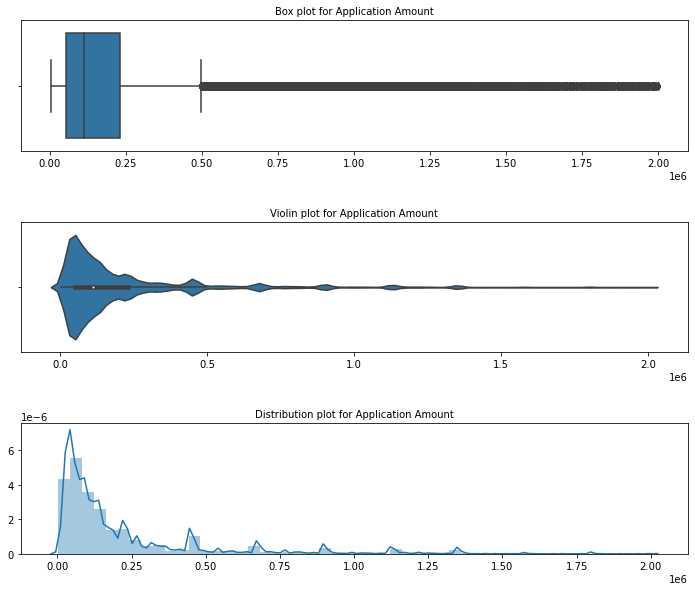

<Figure size 288x432 with 0 Axes>

In [177]:
# Let's plot a  box plot for Amount Application
# Let's plot a violin plot for Amount Application

fig, ax = plt.subplots(3, 1, figsize=(10,8))

fig.tight_layout(h_pad=5,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(previous_application.AMT_APPLICATION,orient='h',ax=ax[0])
ax[0].set_title('Box plot for Application Amount',fontsize=10)

sns.violinplot(previous_application.AMT_APPLICATION,orient='h',ax=ax[1])
ax[1].set_title('Violin plot for Application Amount',fontsize=10)

sns.distplot(previous_application.AMT_APPLICATION,ax=ax[2])
ax[2].set_title('Distribution plot for Application Amount', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
plt.show()

### Inferences from the plots for Application Amount:
- The data is heavily distributed between the values 0 to 0.25M for the application amount.
- 75% of the data lies between 0 to 0.25 and there is very small amount of data above 0.25.

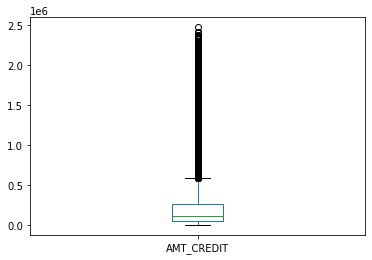

In [178]:
# Let's analyze amount of credit using box plot

previous_application.AMT_CREDIT.plot.box()
plt.show()

In [179]:
# We are clearly see the outliers from the box plot.
# We can delete those entry and consider only those who have the application amount to be lesser than 3 million.
# Removing those upper entries

previous_application = previous_application[~(previous_application.AMT_APPLICATION>2*pow(10,6))]

## Analysis for Distribution of Previous Credit Amount

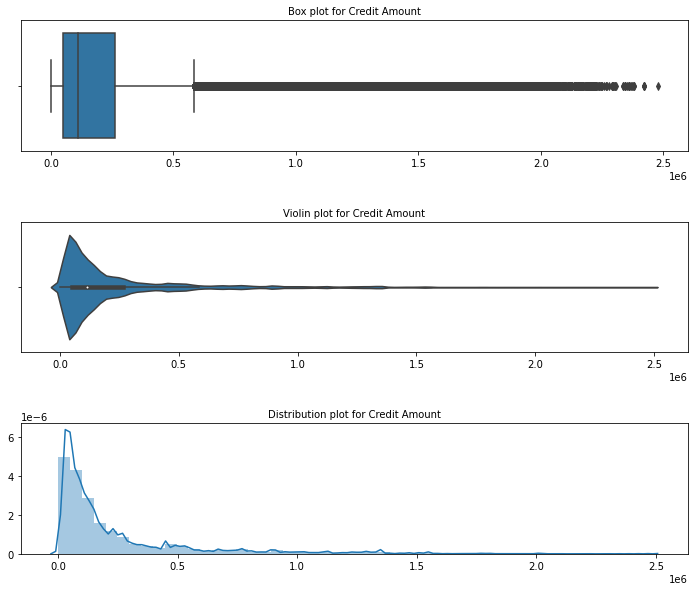

<Figure size 288x432 with 0 Axes>

In [180]:
# Let's plot a  box plot for Amount Credit
# Let's plot a violin plot for Amount Credit

fig, ax = plt.subplots(3, 1, figsize=(10,8))

fig.tight_layout(h_pad=5,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(previous_application.AMT_CREDIT,orient='h',ax=ax[0])
ax[0].set_title('Box plot for Credit Amount',fontsize=10)

sns.violinplot(previous_application.AMT_CREDIT,orient='h',ax=ax[1])
ax[1].set_title('Violin plot for Credit Amount',fontsize=10)

sns.distplot(previous_application.AMT_CREDIT,ax=ax[2])
ax[2].set_title('Distribution plot for Credit Amount', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
plt.show()

### Inferences from the plots for Previous Credit Amount:
- The data is heavily distributed between the values 0 to 0.25M for the credit amount.
- 75% of the data lies between 0 to 0.26M and there is very small amount of data above 0.6M.

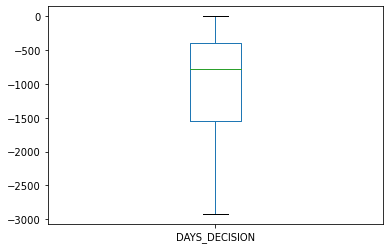

In [181]:
# Let's analyze gap between previous application and current application using box plot

previous_application.DAYS_DECISION.plot.box()
plt.show()

In [182]:
# We can see many negative and high magnitude values in the column.
# As they are w.r.t current application, we can change it to previous application for the ease of understanding
# We can convert those to years and then add those into new column.

previous_application['YEARS_DECISION'] = previous_application.DAYS_DECISION.apply(lambda day: -(day/365.0))

In [183]:
# Let's drop the unnecessary DAYS_DECISION column

previous_application.drop(['DAYS_DECISION'], inplace=True, axis=1)

## Analysis for the Years between the previous and current application

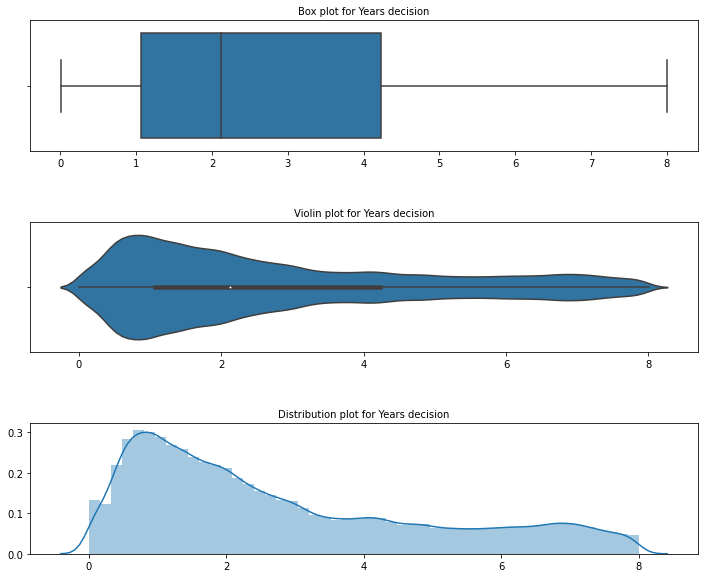

<Figure size 288x432 with 0 Axes>

In [184]:
# Let's plot a  box plot for Years decision (Gap between the applications)
# Let's plot a violin plot for Years decision
# Let's plot a distribution plot for Years decision

fig, ax = plt.subplots(3, 1, figsize=(10,8))

fig.tight_layout(h_pad=5,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(previous_application.YEARS_DECISION,orient='h',ax=ax[0])
ax[0].set_title('Box plot for Years decision',fontsize=10)

sns.violinplot(previous_application.YEARS_DECISION,orient='h',ax=ax[1])
ax[1].set_title('Violin plot for Years decision',fontsize=10)

sns.distplot(previous_application.YEARS_DECISION,ax=ax[2])
ax[2].set_title('Distribution plot for Years decision', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
plt.show()

### Inferences from the plots for Years Decision:
- There is uniformly distribution of the data through out the dataset.
- From box plot and distribution plot, the frequency between 0 to 2 years is more as compared to other.
- The mean lies at ~2 years and 75% of the data is covered between 0 to 4 years.

In [185]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  YEARS_DECISION  
0             Approved         Repeater        0.200000  
1             Approved         Repeater        0.449315  
2             Approved         Repeater        0.824658  
3             Approved         Repeater        1.402740  
4              Refused         Repeater        2.139726

In [186]:
previous_application.shape

(1268023, 8)

## Distribution for Decision Years with Amount of Application

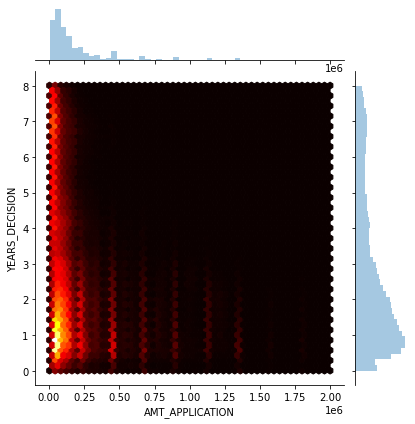

In [187]:
plot = sns.jointplot(x = 'AMT_APPLICATION', 
              y = 'YEARS_DECISION',
              data = previous_application, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)
plt.show()

### Inferences from the above Jointplot between Application Amount and Years Decision
- We are using the jointplot for the using kind as 'hex' as it shows the counts of observations that fall within hexagonal bins, so that it will be easier to identify the intensity of the clusters directly.
- We can see the observe the color changes to lighter value when there is a cluster present in the data.
- We can see the values between 0 to 0.25M of application amount and 0 to 2 years of decision, where there is a large percentage of color change and a huge amount of data is concentrated.
- These can be the deciding factors for the required analysis as more information is available for those values in comparison with the other.

## Distribution of Contract Status w.r.t Contract Types

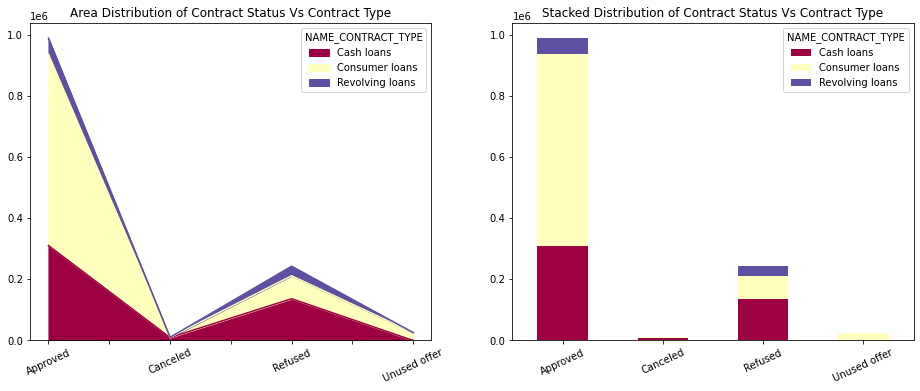

In [188]:
# Let's analyze how the count of contract statuses are spread across contract types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

status_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE'].value_counts()

status_wise_loan_types.unstack().plot(kind='area',stacked=True, colormap= 'Spectral',ax=ax[0])
ax[0].set_title('Area Distribution of Contract Status Vs Contract Type')

status_wise_loan_types.unstack().plot(kind='bar',stacked=True, colormap= 'Spectral',ax=ax[1])
ax[1].set_title('Stacked Distribution of Contract Status Vs Contract Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences from the Stacked Bar Chart:
- Inference 1: We can clearly observe the distribution for Consumer Loans in Approved Loans is very high. Cash Loans also has considerable amount of distribution.
- Inference 2: It seems Cash Loans are refused more in comparison with other types of contracts.
- Inference 3: There is very small distribution for Canceled and Unused Offer statuses, we can not conclude on that.

## Distribution of Contact Status w.r.t. Client Type

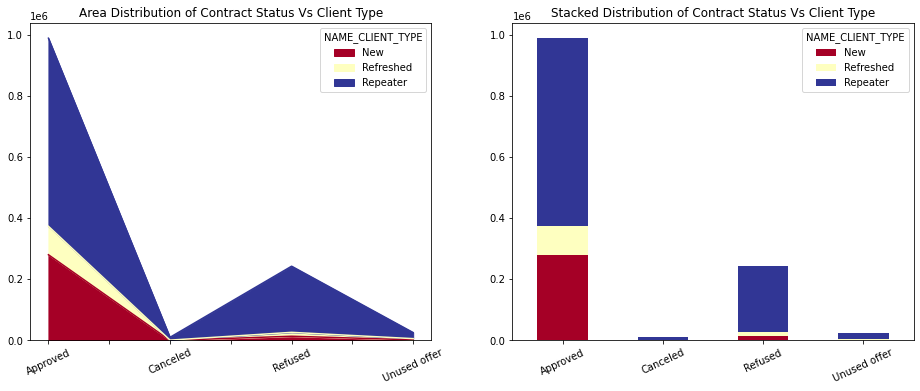

In [189]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

client_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CLIENT_TYPE'].value_counts()

client_wise_loan_types.unstack().plot(kind='area',stacked=True, colormap= 'RdYlBu',ax=ax[0])
ax[0].set_title('Area Distribution of Contract Status Vs Client Type')

client_wise_loan_types.unstack().plot(kind='bar',stacked=True, colormap= 'RdYlBu',ax=ax[1])
ax[1].set_title('Stacked Distribution of Contract Status Vs Client Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences from the Stacked Bar Chart:
- Inference 1: Repeaters has highest number of Approved Loans w.r.t other Refreshed and New Loans.
- Inference 2: It seems Repeaters has also highest number of Refused Loans w.r.t other Refreshed and New Loans.
- Inference 3: There is very small distribution for Canceled and Unused Offer statuses, we can not conclude on that.

## Distribution of Contract Status w.r.t. Client Types and Contract Types.

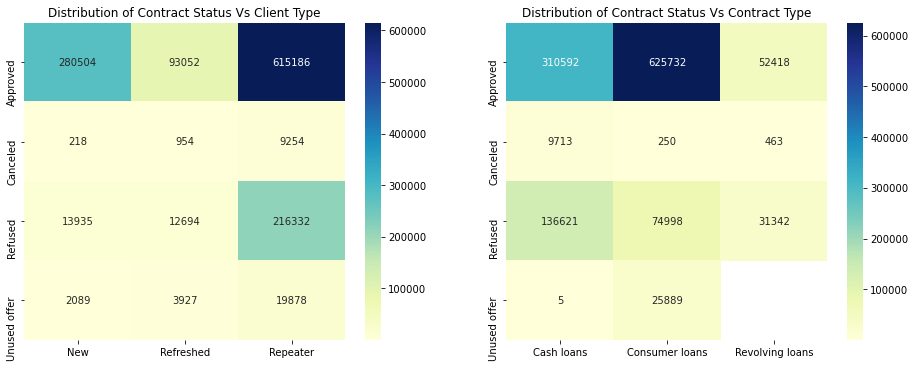

In [190]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

client_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CLIENT_TYPE'].value_counts().unstack()
sns.heatmap(data=client_wise_loan_types, annot=True,ax=ax[0], fmt="d" , cmap='YlGnBu')
ax[0].set_title('Distribution of Contract Status Vs Client Type')

contract_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE'].value_counts().unstack()
sns.heatmap(data=contract_wise_loan_types, annot=True,ax=ax[1], fmt="0.0f", cmap='YlGnBu')
ax[1].set_title('Distribution of Contract Status Vs Contract Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences from above Heat Maps:
- Inference 1: Overall Distribution for Repeaters is quite high in all the contract statuses.
- Inference 2: Approved Statuses are more as in general as compared to other statuses.
- Inference 3: Consumer Loans and Repeaters seems to have more approved loans as compared to other categories.

In [191]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  YEARS_DECISION  
0             Approved         Repeater        0.200000  
1             Approved         Repeater        0.449315  
2             Approved         Repeater        0.824658  
3             Approved         Repeater        1.402740  
4              Refused         Repeater        2.139726

In [192]:
previous_application.shape

(1268023, 8)

## Distribution of Application and Credit Amount, Years Birth using Pairplots

<Figure size 432x432 with 0 Axes>

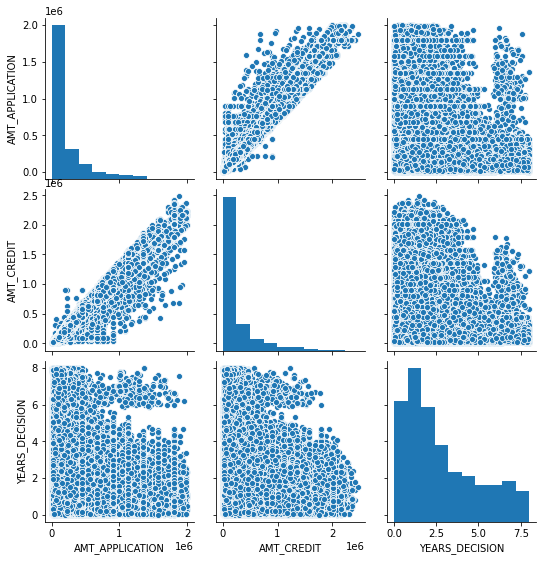

In [193]:
plt.figure(figsize=[6,6])
sns.pairplot(previous_application[['AMT_APPLICATION','AMT_CREDIT','YEARS_DECISION']])
plt.show()

## Inferences from the above Pairplot:
- Inference 1: There is no as such relation observed between Decision Years and Application or Credit amount. But, there is very small distribution higher values of credit amount and application amount for more than 4 decision years.
- Inference 2: We can see Application Amount and Credit Amount higher linear relationship except for some cases which are not following the linear pattern.

In [194]:
# Let's bucket the total requested amount of previous application into 5 groups viz. '<45K','45k to 85K','85K to 138K','138K to 315K','>315K'

previous_application['AMT_APPLICATION_RANGE'] = pd.cut(previous_application.AMT_APPLICATION ,bins=5,labels=['Very Low', 'Low', 'Average', 'High', 'Very High'])


# Let's bucket the credit amount of previous application into 5 groups viz. <0.1M, 0.1M to 0.6M, 0.6M to 1.1M, 1.1M to 1.6M, >1.6M

previous_application['AMT_CREDIT_RANGE'] = pd.cut(previous_application.AMT_CREDIT ,bins=5,labels=['Very Low', 'Low', 'Average', 'High', 'Very High'])


# Let's bucket the years between previous and current application into 6 groups viz. '<1', '1 to 1.65', '1.65 to 2.73', '2.73 to 4.87', '>4.87'

previous_application['YEARS_DECISION_RANGE'] = pd.cut(previous_application.YEARS_DECISION ,bins=5,labels=['Very Low', 'Low', 'Average', 'High', 'Very High'])

In [195]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  YEARS_DECISION AMT_APPLICATION_RANGE  \
0             Approved         Repeater        0.200000              Very Low   
1             Approved         Repeater        0.449315                   Low   
2             Approved         Repeater        0.824658              Very Low   
3             Approved         Repeater        1.402740                   Low   
4              Refused         Repeater        2.139726              Very Low   

  AMT_CREDIT_RANGE YEARS_DECISION_RANGE  
0         Very Low             Very Low  
1              Low             Very Low  
2         Very Low             Very Low  
3         Very Low             Very Low  
4         Very Low                  Low

## Distribution of Application Amount and Credit Amount w.r.t Contract  Status

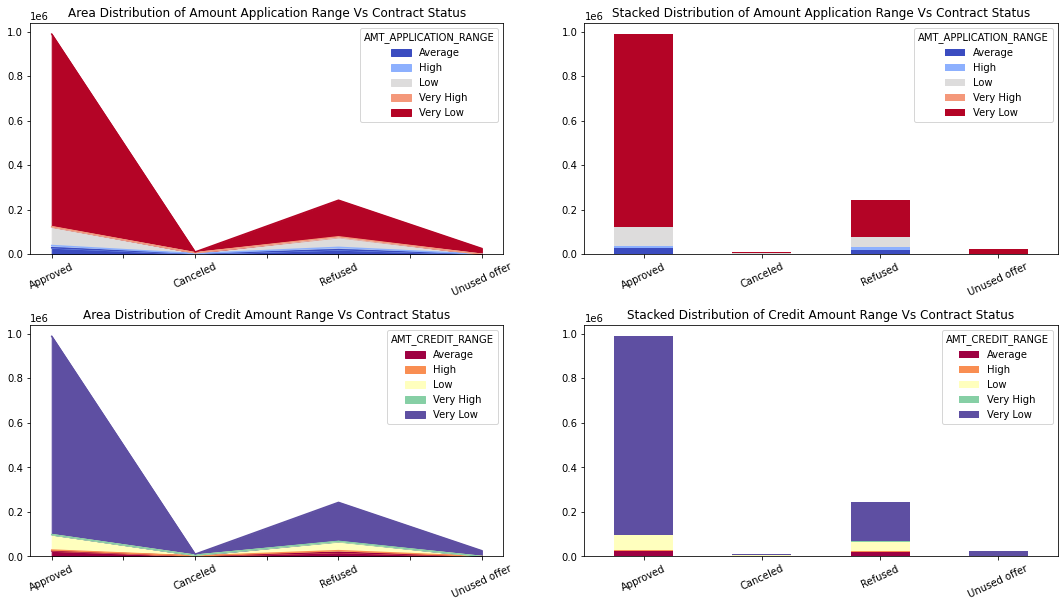

In [196]:
# Let's analyze how the count of contract statuses are spread across contract types.

fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

application_status = previous_application.groupby(['NAME_CONTRACT_STATUS'])['AMT_APPLICATION_RANGE'].value_counts()

application_status.unstack().plot(kind='area',stacked=True, colormap= 'coolwarm',ax=ax[0][0])
ax[0][0].set_title('Area Distribution of Amount Application Range Vs Contract Status')

application_status.unstack().plot(kind='bar',stacked=True, colormap= 'coolwarm',ax=ax[0][1])
ax[0][1].set_title('Stacked Distribution of Amount Application Range Vs Contract Status')


credit_status = previous_application.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT_RANGE'].value_counts()

credit_status.unstack().plot(kind='area',stacked=True, colormap= 'Spectral',ax=ax[1][0])
ax[1][0].set_title('Area Distribution of Credit Amount Range Vs Contract Status')

credit_status.unstack().plot(kind='bar',stacked=True, colormap= 'Spectral',ax=ax[1][1])
ax[1][1].set_title('Stacked Distribution of Credit Amount Range Vs Contract Status')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences drawn from the above Area and Stacked Bar Charts:
- In general, the distribution is almost similar in all the categories for application amount or credit amount range.
- The percentage of Very Low Credit/Application is more in every category, but it is exceptionally high in Approved Category. So we can say, those who are having Very Low Credit/Application are likely going to be considered.
- The canceled and Unused Offer have very less distribution, so we cannot infer anything from those categories.

In [197]:
# As we can see there is almost similar groups in AMT_CREDIT and AMT_APPLICATION, so we can remove AMT_APPLICATION group from our analysis

previous_application.drop(['AMT_APPLICATION'],inplace=True, axis=1)
previous_application.drop(['AMT_CREDIT'],inplace=True, axis=1)
previous_application.drop(['YEARS_DECISION'],inplace=True, axis=1)

previous_application.drop(['AMT_APPLICATION_RANGE'],inplace=True, axis=1)

In [198]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  \
0     2030495      271877     Consumer loans             Approved   
1     2802425      108129         Cash loans             Approved   
2     2523466      122040         Cash loans             Approved   
3     2819243      176158         Cash loans             Approved   
4     1784265      202054         Cash loans              Refused   

  NAME_CLIENT_TYPE AMT_CREDIT_RANGE YEARS_DECISION_RANGE  
0         Repeater         Very Low             Very Low  
1         Repeater              Low             Very Low  
2         Repeater         Very Low             Very Low  
3         Repeater         Very Low             Very Low  
4         Repeater         Very Low                  Low

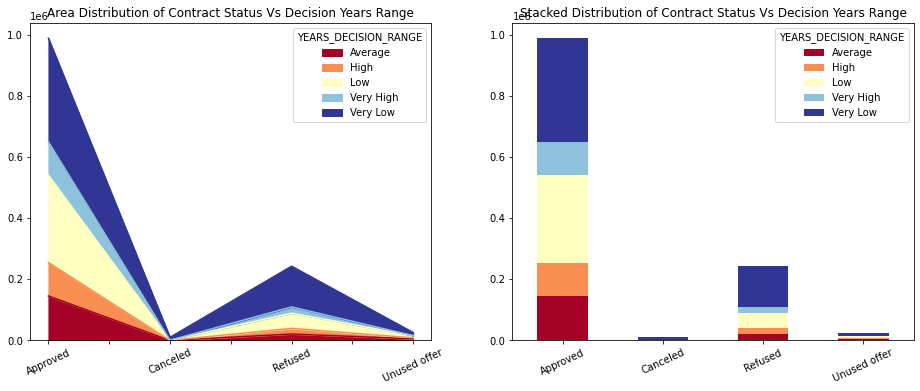

In [199]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

year_wise_contract = previous_application.groupby(['NAME_CONTRACT_STATUS'])['YEARS_DECISION_RANGE'].value_counts()

year_wise_contract.unstack().plot(kind='area',stacked=True, colormap= 'RdYlBu',ax=ax[0])
ax[0].set_title('Area Distribution of Contract Status Vs Decision Years Range')

year_wise_contract.unstack().plot(kind='bar',stacked=True, colormap= 'RdYlBu',ax=ax[1])
ax[1].set_title('Stacked Distribution of Contract Status Vs Decision Years Range')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences drawn from the above Area and Stacked Bar Charts:
- The distribution is almost similar in all the categories for decision years.
- Those who have very low gap between the previous and current applications, are accepted and refused more in higher percentage as compared to other ranges.
- So, we need to take multiple columns into consideration to analyze the exact relationship between those two.

## Distribution of Contract Status w.r.t. Credit Amount Range and Decision Years Range

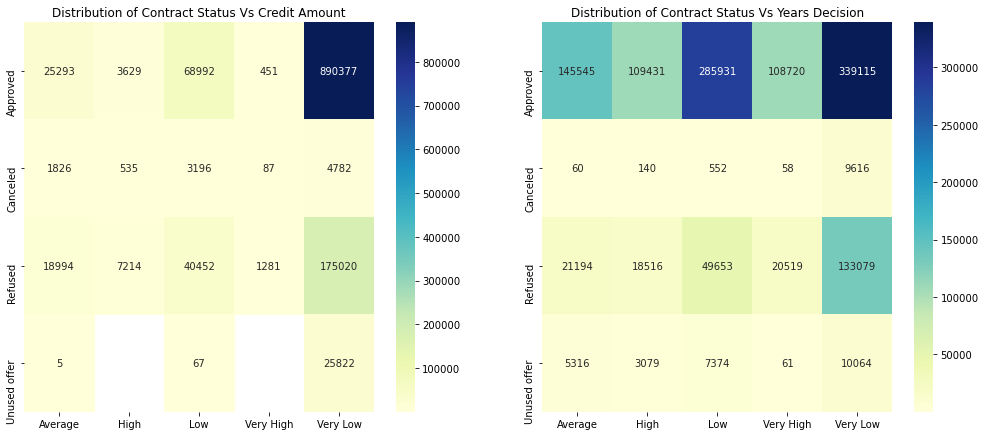

In [200]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(14,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

credit_contract = previous_application.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT_RANGE'].value_counts().unstack()
sns.heatmap(data=credit_contract, annot=True,ax=ax[0], fmt="0.0f" , cmap='YlGnBu')
ax[0].set_title('Distribution of Contract Status Vs Credit Amount')

years_decision_contract = previous_application.groupby(['NAME_CONTRACT_STATUS'])['YEARS_DECISION_RANGE'].value_counts().unstack()
sns.heatmap(data=years_decision_contract, annot=True,ax=ax[1], fmt="0.0f", cmap='YlGnBu')
ax[1].set_title('Distribution of Contract Status Vs Years Decision')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inferences drawn from the above Heat Maps:
- The loan types where credit amount is very low are approved easily. But the number of refused customers are also significantly greater.
- Those who have very low gap between the previous and current applications, are refused in higher percentage.

# We will now combine the two datasets and try to generate some meaningful insights

- We will combine our filtered application_data with filtered previous_application based on SK_ID_CURR.
- SK_ID_CURR in previous application data indicates that it is the id of the loan in current application data.
- As one person can have multiple loans, there are many entries for a single id from application data in previous application data.

In [201]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN NAME_INCOME_TYPE  \
0                1             0          Working   
1                0             0    State servant   
2                1             0          Working   
3                1             0          Working   
4                1             0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE AMT_INCOME_RANGE AMT_CREDIT_RANGE  \
0                1   Business Entity        Below Avg        Below Avg   
1                2            School             Mean        Above Avg   
2                1        Government        Below Avg        Below Avg   
3                2   Business Entity        Below Avg        Below Avg   
4                1          Religion        Below Avg             Mean   

  AMT_ANNUITY_RANGE AMT_GOODS_RANGE YEARS_BIRTH_RANGE YEARS_EMPLOYED_RANGE  
0         Below Avg       Below Avg         Below Avg            Below Avg  
1              Mean       Above Avg         Above Avg            Below Avg  
2         Below Avg       Below Avg              Good            Below Avg  
3              Mean       Below Avg              Good            Below Avg  
4         Below Avg            Mean              Good            Below Avg

In [202]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  \
0     2030495      271877     Consumer loans             Approved   
1     2802425      108129         Cash loans             Approved   
2     2523466      122040         Cash loans             Approved   
3     2819243      176158         Cash loans             Approved   
4     1784265      202054         Cash loans              Refused   

  NAME_CLIENT_TYPE AMT_CREDIT_RANGE YEARS_DECISION_RANGE  
0         Repeater         Very Low             Very Low  
1         Repeater              Low             Very Low  
2         Repeater         Very Low             Very Low  
3         Repeater         Very Low             Very Low  
4         Repeater         Very Low                  Low

In [203]:
# Merging the previous application data with current application data based on SK_CURR_ID.

merge_application_previous = previous_application.merge(application_data,on='SK_ID_CURR',suffixes=['_PREV','_CURR'])
merge_application_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PREV NAME_CONTRACT_STATUS  \
0     2030495      271877          Consumer loans             Approved   
1     1696966      271877          Consumer loans              Refused   
2     2154916      271877          Consumer loans             Approved   
3     2802425      108129              Cash loans             Approved   
4     1536272      108129              Cash loans             Approved   

  NAME_CLIENT_TYPE AMT_CREDIT_RANGE_PREV YEARS_DECISION_RANGE  TARGET  \
0         Repeater              Very Low             Very Low       0   
1         Repeater                  High             Very Low       0   
2              New              Very Low             Very Low       0   
3         Repeater                   Low             Very Low       0   
4         Repeater                   Low             Very Low       0   

  NAME_CONTRACT_TYPE_CURR CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0              Cash loans           F             0                1   
1              Cash loans           F             0                1   
2              Cash loans           F             0                1   
3         Revolving loans           F             0                0   
4         Revolving loans           F             0                0   

   CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             1         State servant              Incomplete higher   
1             1         State servant              Incomplete higher   
2             1         State servant              Incomplete higher   
3             0  Commercial associate  Secondary / secondary special   
4             0  Commercial associate  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0            Married  House / apartment                3          Military   
1            Married  House / apartment                3          Military   
2            Married  House / apartment                3          Military   
3     Civil marriage  House / apartment                2     Self-employed   
4     Civil marriage  House / apartment                2     Self-employed   

  AMT_INCOME_RANGE AMT_CREDIT_RANGE_CURR AMT_ANNUITY_RANGE AMT_GOODS_RANGE  \
0             Mean                  Mean              Mean            Mean   
1             Mean                  Mean              Mean            Mean   
2             Mean                  Mean              Mean            Mean   
3        Below Avg             Below Avg         Below Avg       Below Avg   
4        Below Avg             Below Avg         Below Avg       Below Avg   

  YEARS_BIRTH_RANGE YEARS_EMPLOYED_RANGE  
0              Mean            Above Avg  
1              Mean            Above Avg  
2              Mean            Above Avg  
3              Good            Below Avg  
4              Good            Below Avg

## Analysis for number of loans per customer

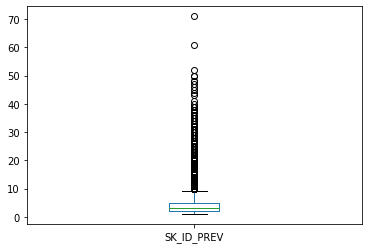

In [204]:
merge_application_previous.groupby('SK_ID_CURR')['SK_ID_PREV'].count().plot(kind='box')

# Inferences:
- There are many customers who have applied for loans even more than 40 times. Obviously, we won't consider such data for analysis.
- We will consider only those customers who are applied for less than 5 loans so that it will be an ideal situation and analysis will be a little easier. 

In [205]:
# let's remove those values where number of previous loan applications is more than 5.
bool_prev = merge_application_previous.groupby('SK_ID_CURR')['SK_ID_PREV'].count() <= 5
merge_application_previous = merge_application_previous.iloc[bool_prev.index,:]
merge_application_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PREV NAME_CONTRACT_STATUS  \
100002     1796762      301677          Consumer loans             Approved   
100003     2609835      380882              Cash loans             Approved   
100004     1941202      380882          Consumer loans             Approved   
100006     1289475      380882              Cash loans             Approved   
100007     1652057      142648              Cash loans             Approved   

       NAME_CLIENT_TYPE AMT_CREDIT_RANGE_PREV YEARS_DECISION_RANGE  TARGET  \
100002              New              Very Low             Very Low       0   
100003         Repeater              Very Low                  Low       0   
100004              New              Very Low                  Low       0   
100006         Repeater               Average                  Low       0   
100007        Refreshed              Very Low             Very Low       0   

       NAME_CONTRACT_TYPE_CURR CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
100002              Cash loans           M             1                0   
100003              Cash loans           M             1                0   
100004              Cash loans           M             1                0   
100006              Cash loans           M             1                0   
100007              Cash loans           M             1                0   

        CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
100002             0               Working  Secondary / secondary special   
100003             0  Commercial associate               Higher education   
100004             0  Commercial associate               Higher education   
100006             0  Commercial associate               Higher education   
100007             0  Commercial associate  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS  \
100002            Married  House / apartment                2   
100003            Married  House / apartment                2   
100004            Married  House / apartment                2   
100006            Married  House / apartment                2   
100007     Civil marriage  House / apartment                2   

       ORGANIZATION_TYPE AMT_INCOME_RANGE AMT_CREDIT_RANGE_CURR  \
100002   Business Entity        Below Avg             Above Avg   
100003         Transport             Good                  Mean   
100004         Transport             Good                  Mean   
100006         Transport             Good                  Mean   
100007     Self-employed        Below Avg             Below Avg   

       AMT_ANNUITY_RANGE AMT_GOODS_RANGE YEARS_BIRTH_RANGE  \
100002              Mean       Above Avg            Better   
100003              Mean            Mean         Above Avg   
100004              Mean            Mean         Above Avg   
100006              Mean            Mean         Above Avg   
100007              Mean       Below Avg              Mean   

       YEARS_EMPLOYED_RANGE  
100002                 Mean  
100003            Below Avg  
100004            Below Avg  
100006            Below Avg  
100007            Below Avg

### Let's analyze whether we can draw some inferences based on this data or not.
- We will consider only those previous entries where the contract status is either Approved Or Refused.
- As other two types may not affect our analysis or not even required as they are the decision of clients.
- Let's divide the merged data into two dataframes considering the Target column: 1. Likely to default 2. Not likely to default. (We can do this by separately merging the already split dataframes also.)

In [206]:
# Let's eliminate those entries where the status is not Approved or Rejected.
merge_application_previous = merge_application_previous[(merge_application_previous.NAME_CONTRACT_STATUS == 'Approved')
                                                       | (merge_application_previous.NAME_CONTRACT_STATUS == 'Refused')]

likely_to_default_merged = merge_application_previous[merge_application_previous.TARGET == 1]
not_likely_to_default_merged = merge_application_previous[merge_application_previous.TARGET == 0]

In [207]:
# Let's convert the Contract Status column into two numberic categories 1 (Approved) and 0 (Rejected) for analysis

likely_to_default_merged.NAME_CONTRACT_STATUS.replace(to_replace=['Approved', 'Refused'], value=[1, 0],inplace=True)
not_likely_to_default_merged.NAME_CONTRACT_STATUS.replace(to_replace=['Approved', 'Refused'], value=[1, 0],inplace=True)

In [208]:
likely_to_default_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PREV  NAME_CONTRACT_STATUS  \
100186     1287266      194612              Cash loans                     1   
100188     2438561      194612              Cash loans                     1   
100189     2131059      194612              Cash loans                     1   
100190     2441686      194612              Cash loans                     0   
100191     1250313      194612              Cash loans                     0   

       NAME_CLIENT_TYPE AMT_CREDIT_RANGE_PREV YEARS_DECISION_RANGE  TARGET  \
100186         Repeater              Very Low                  Low       1   
100188         Repeater              Very Low                 High       1   
100189         Repeater              Very Low              Average       1   
100190         Repeater                   Low                  Low       1   
100191         Repeater                   Low                  Low       1   

       NAME_CONTRACT_TYPE_CURR CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
100186              Cash loans           M             1                1   
100188              Cash loans           M             1                1   
100189              Cash loans           M             1                1   
100190              Cash loans           M             1                1   
100191              Cash loans           M             1                1   

        CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
100186             0  Commercial associate  Secondary / secondary special   
100188             0  Commercial associate  Secondary / secondary special   
100189             0  Commercial associate  Secondary / secondary special   
100190             0  Commercial associate  Secondary / secondary special   
100191             0  Commercial associate  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS  \
100186            Married  House / apartment                2   
100188            Married  House / apartment                2   
100189            Married  House / apartment                2   
100190            Married  House / apartment                2   
100191            Married  House / apartment                2   

       ORGANIZATION_TYPE AMT_INCOME_RANGE AMT_CREDIT_RANGE_CURR  \
100186     Self-employed             Mean                  Mean   
100188     Self-employed             Mean                  Mean   
100189     Self-employed             Mean                  Mean   
100190     Self-employed             Mean                  Mean   
100191     Self-employed             Mean                  Mean   

       AMT_ANNUITY_RANGE AMT_GOODS_RANGE YEARS_BIRTH_RANGE  \
100186         Below Avg            Mean         Above Avg   
100188         Below Avg            Mean         Above Avg   
100189         Below Avg            Mean         Above Avg   
100190         Below Avg            Mean         Above Avg   
100191         Below Avg            Mean         Above Avg   

       YEARS_EMPLOYED_RANGE  
100186            Below Avg  
100188            Below Avg  
100189            Below Avg  
100190            Below Avg  
100191            Below Avg

In [209]:
not_likely_to_default_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PREV  NAME_CONTRACT_STATUS  \
100002     1796762      301677          Consumer loans                     1   
100003     2609835      380882              Cash loans                     1   
100004     1941202      380882          Consumer loans                     1   
100006     1289475      380882              Cash loans                     1   
100007     1652057      142648              Cash loans                     1   

       NAME_CLIENT_TYPE AMT_CREDIT_RANGE_PREV YEARS_DECISION_RANGE  TARGET  \
100002              New              Very Low             Very Low       0   
100003         Repeater              Very Low                  Low       0   
100004              New              Very Low                  Low       0   
100006         Repeater               Average                  Low       0   
100007        Refreshed              Very Low             Very Low       0   

       NAME_CONTRACT_TYPE_CURR CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
100002              Cash loans           M             1                0   
100003              Cash loans           M             1                0   
100004              Cash loans           M             1                0   
100006              Cash loans           M             1                0   
100007              Cash loans           M             1                0   

        CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
100002             0               Working  Secondary / secondary special   
100003             0  Commercial associate               Higher education   
100004             0  Commercial associate               Higher education   
100006             0  Commercial associate               Higher education   
100007             0  Commercial associate  Secondary / secondary special   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS  \
100002            Married  House / apartment                2   
100003            Married  House / apartment                2   
100004            Married  House / apartment                2   
100006            Married  House / apartment                2   
100007     Civil marriage  House / apartment                2   

       ORGANIZATION_TYPE AMT_INCOME_RANGE AMT_CREDIT_RANGE_CURR  \
100002   Business Entity        Below Avg             Above Avg   
100003         Transport             Good                  Mean   
100004         Transport             Good                  Mean   
100006         Transport             Good                  Mean   
100007     Self-employed        Below Avg             Below Avg   

       AMT_ANNUITY_RANGE AMT_GOODS_RANGE YEARS_BIRTH_RANGE  \
100002              Mean       Above Avg            Better   
100003              Mean            Mean         Above Avg   
100004              Mean            Mean         Above Avg   
100006              Mean            Mean         Above Avg   
100007              Mean       Below Avg              Mean   

       YEARS_EMPLOYED_RANGE  
100002                 Mean  
100003            Below Avg  
100004            Below Avg  
100006            Below Avg  
100007            Below Avg

In [210]:
# Function to plot heat_maps for NAME_CONTRACT_STATUS as values
def plot_status_heat_maps(data, index, column, ax, title):
    pivot_table = pd.pivot_table(data=data,index=index,columns=column,values='NAME_CONTRACT_STATUS')
    sns.heatmap(pivot_table,cmap="RdYlGn",vmin=0,vmax=1,annot=True,annot_kws={"size": 15},ax=ax)
    ax.set_title(title,fontsize=12)

## Analysis for Income Range and Types of clients w.r.t. Contract Status

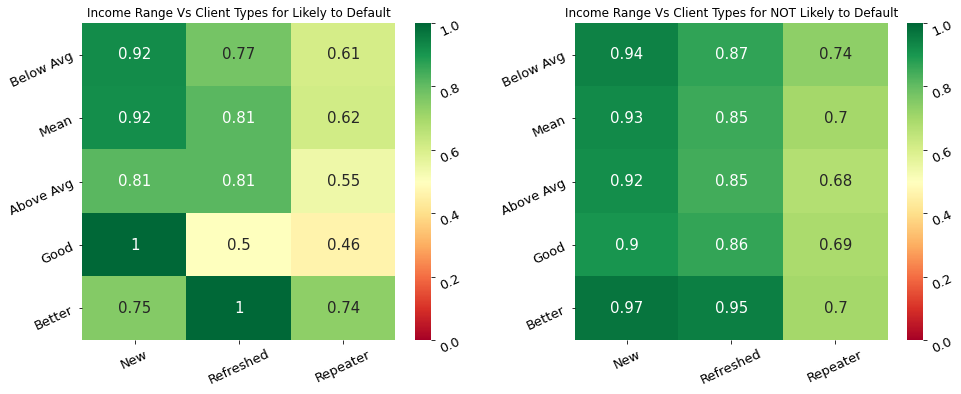

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=7)

plot_status_heat_maps(likely_to_default_merged,'AMT_INCOME_RANGE','NAME_CLIENT_TYPE', ax[0], 'Income Range Vs Client Types for Likely to Default')
plot_status_heat_maps(not_likely_to_default_merged,'AMT_INCOME_RANGE','NAME_CLIENT_TYPE',ax[1], 'Income Range Vs Client Types for NOT Likely to Default')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=25)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inference from the above heatmaps:
- Those who are `likely to default`, have good income and are new clients, most number of applications are `APPROVED`. That may be the decision making factor for the bank as they are facing payment difficulties and are likely to default. So refusing such applications can lead to business profits. Similar condition for refreshed customers with better income.
- Percentage for likely to customers who are repeater and with Good income is very less. `That means bank has previously rejected such customers and that is a good decision`, which may lead to business profits.

- The refused percentage decreases as the number of loans per customer is increases for the customers who are NOT likely to default. This is also a satisfying result as approving the applications for the ones who are new and have considerable amount of salary range, are likely to pay the loans. `Approving such loans may lead to business profit, and not approving such loans may lead to business loss.`

## Analysis for Current Credit Range and Types of clients w.r.t. Contract Status

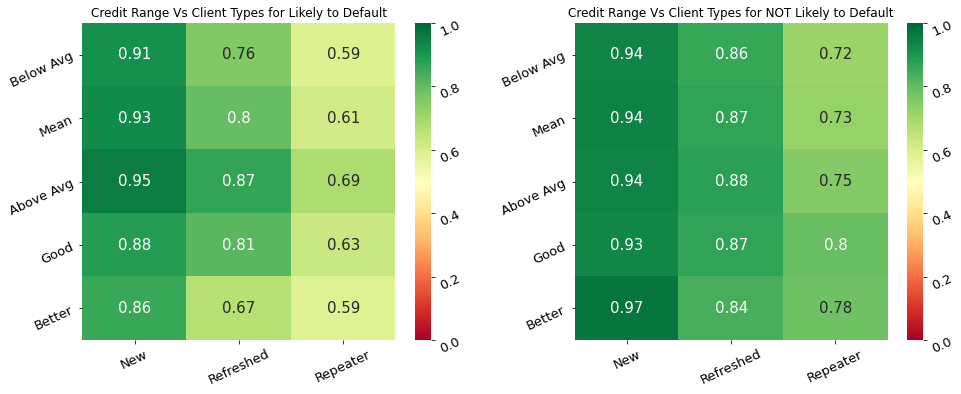

In [212]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=7)

plot_status_heat_maps(likely_to_default_merged,'AMT_CREDIT_RANGE_CURR','NAME_CLIENT_TYPE', ax[0], 'Credit Range Vs Client Types for Likely to Default')
plot_status_heat_maps(not_likely_to_default_merged,'AMT_CREDIT_RANGE_CURR','NAME_CLIENT_TYPE',ax[1], 'Credit Range Vs Client Types for NOT Likely to Default')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=25)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inference from the above heatmaps:
- Refuse percentage for Repeater customers who are facing payment difficulties and are likely to default is higher. This is the ideal case where accepting such loans may lead to business loss in future. Also for customers who are not likely to default and with low credit range should be accepted as rejecting those may lead to loss in business.
- For the `new` customers with `considerable income` and are `facing payment difficulties`, we can decide the approval of the loan on the basis of certain business decisions such as reducing the interest rates, reducing the loan amount, and approving the loan may lead to business profits.`This is NOT observed pattern in the heatmap`, as the new customers with above avg credit amount are accepted more, which may lead to `business loss`.